In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
import missingno as msn
import math
from scipy.stats import boxcox
from scipy.stats import tstd
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import anderson

In [40]:
df = pd.read_csv("Data.csv")
df

Age  Diastolic BP  Poverty index  Race  Red blood cells  \
0     35.0          92.0          126.0   2.0             77.7   
1     71.0          78.0          210.0   2.0             77.7   
2     74.0          86.0          999.0   2.0             77.7   
3     64.0          92.0          385.0   1.0             77.7   
4     32.0          70.0          183.0   2.0             77.7   
...    ...           ...            ...   ...              ...   
8574  26.0          76.0          491.0   1.0             46.6   
8575  69.0          82.0          316.0   1.0             48.0   
8576  34.0          80.0          187.0   1.0             47.3   
8577  57.0          84.0          999.0   1.0             54.7   
8578  70.0          70.0          204.0   1.0             48.8   

      Sedimentation rate  Serum Albumin  Serum Cholesterol  Serum Iron  \
0                   12.0            5.0              165.0       135.0   
1                   37.0            4.0              298.0        89.0   
2                   31.0            3.8              222.0       115.0   
3                   30.0            4.3              265.0        94.0   
4                   18.0            5.0              203.0       192.0   
...                  ...            ...                ...         ...   
8574                 9.0            4.7              137.0        90.0   
8575                18.0            4.7              301.0        98.0   
8576                10.0            4.5              161.0        95.0   
8577                 5.0            4.5              210.0        93.0   
8578                 9.0            4.4              205.0       124.0   

      Serum Magnesium  Serum Protein  Sex  Systolic BP   TIBC    TS  \
0                1.37            7.6  2.0        142.0  323.0  41.8   
1                1.38            6.4  2.0        156.0  331.0  26.9   
2                1.37            7.4  2.0        170.0  299.0  38.5   
3                1.97            7.3  2.0        172.0  349.0  26.9   
4                1.35            7.3  1.0        128.0  386.0  49.7   
...               ...            ...  ...          ...    ...   ...   
8574             1.39            7.4  1.0        104.0  316.0  28.5   
8575             2.02            6.7  2.0        130.0  334.0  29.3   
8576             1.54            6.9  2.0        110.0  381.0  24.9   
8577             1.82            7.0  1.0        130.0  337.0  27.6   
8578             1.91            6.8  1.0        132.0  398.0  31.2   

      White blood cells        BMI  Pulse pressure  death  
0                   5.8  31.109434            50.0    1.0  
1                   5.3  32.362572            78.0    1.0  
2                   8.1  25.388497            84.0    1.0  
3                   6.7  26.446610            80.0    0.0  
4                   8.1  20.354684            58.0    1.0  
...                 ...        ...             ...    ...  
8574               10.7  21.468805            28.0    1.0  
8575                7.1  23.090226            48.0    0.0  
8576                5.4  25.797680            30.0    0.0  
8577                6.2  23.406200            46.0    0.0  
8578                7.5  28.763104            62.0    1.0  

[8579 rows x 19 columns]

In [41]:
"""
Race
1: Non-Hispanic White
2: Non-Hispanic Black or African American
3: Mexican American or Hispanic/Latino"""

'\nRace\n1: Non-Hispanic White\n2: Non-Hispanic Black or African American\n3: Mexican American or Hispanic/Latino'

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8579 entries, 0 to 8578
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 8579 non-null   float64
 1   Diastolic BP        8579 non-null   float64
 2   Poverty index       8579 non-null   float64
 3   Race                8579 non-null   float64
 4   Red blood cells     8579 non-null   float64
 5   Sedimentation rate  8579 non-null   float64
 6   Serum Albumin       8579 non-null   float64
 7   Serum Cholesterol   8579 non-null   float64
 8   Serum Iron          8579 non-null   float64
 9   Serum Magnesium     8579 non-null   float64
 10  Serum Protein       8579 non-null   float64
 11  Sex                 8579 non-null   float64
 12  Systolic BP         8579 non-null   float64
 13  TIBC                8579 non-null   float64
 14  TS                  8579 non-null   float64
 15  White blood cells   8579 non-null   float64
 16  BMI   

In [43]:
categorical_variables = ["Race", "Sex", "death"]
print(f"categorical variables are : {[c for c in categorical_variables]}")

categorical variables are : ['Race', 'Sex', 'death']


In [44]:
quantitative_variables = [q for q in df.columns if q not in categorical_variables]
print(f"quantitative variables are : {quantitative_variables}")

quantitative variables are : ['Age', 'Diastolic BP', 'Poverty index', 'Red blood cells', 'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol', 'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Systolic BP', 'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure']


<AxesSubplot:>

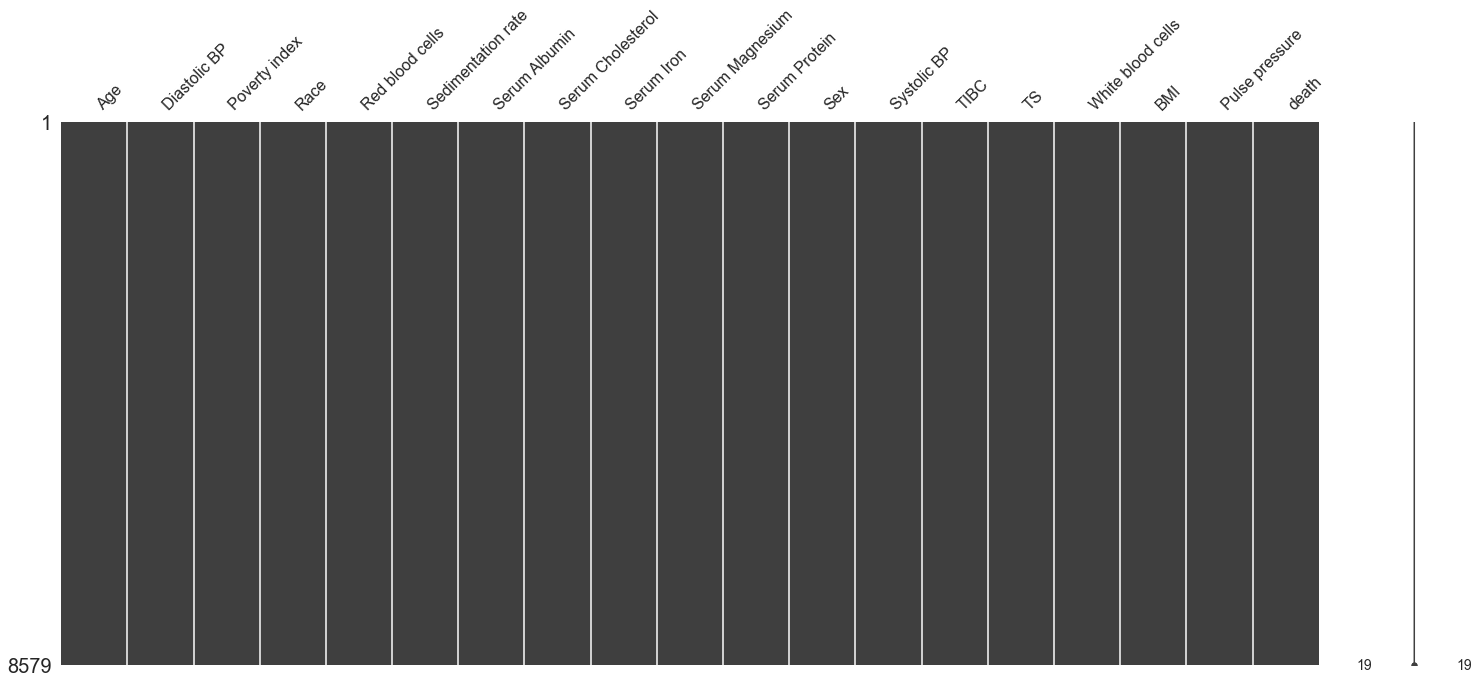

In [45]:
#searching if there is null values
msn.matrix(df)

In [46]:
for feature in df.columns:
    print(f"{feature} : {df[feature].eq(0).any()}")

Age : False
Diastolic BP : False
Poverty index : False
Race : False
Red blood cells : False
Sedimentation rate : False
Serum Albumin : False
Serum Cholesterol : False
Serum Iron : False
Serum Magnesium : False
Serum Protein : False
Sex : False
Systolic BP : False
TIBC : False
TS : False
White blood cells : False
BMI : False
Pulse pressure : False
death : True


In [47]:
df.duplicated().any()

False

## Looking for outliers

### Looking at the whole picture

Text(0.5, 1.0, 'Box Plots For Quantitative Variables')

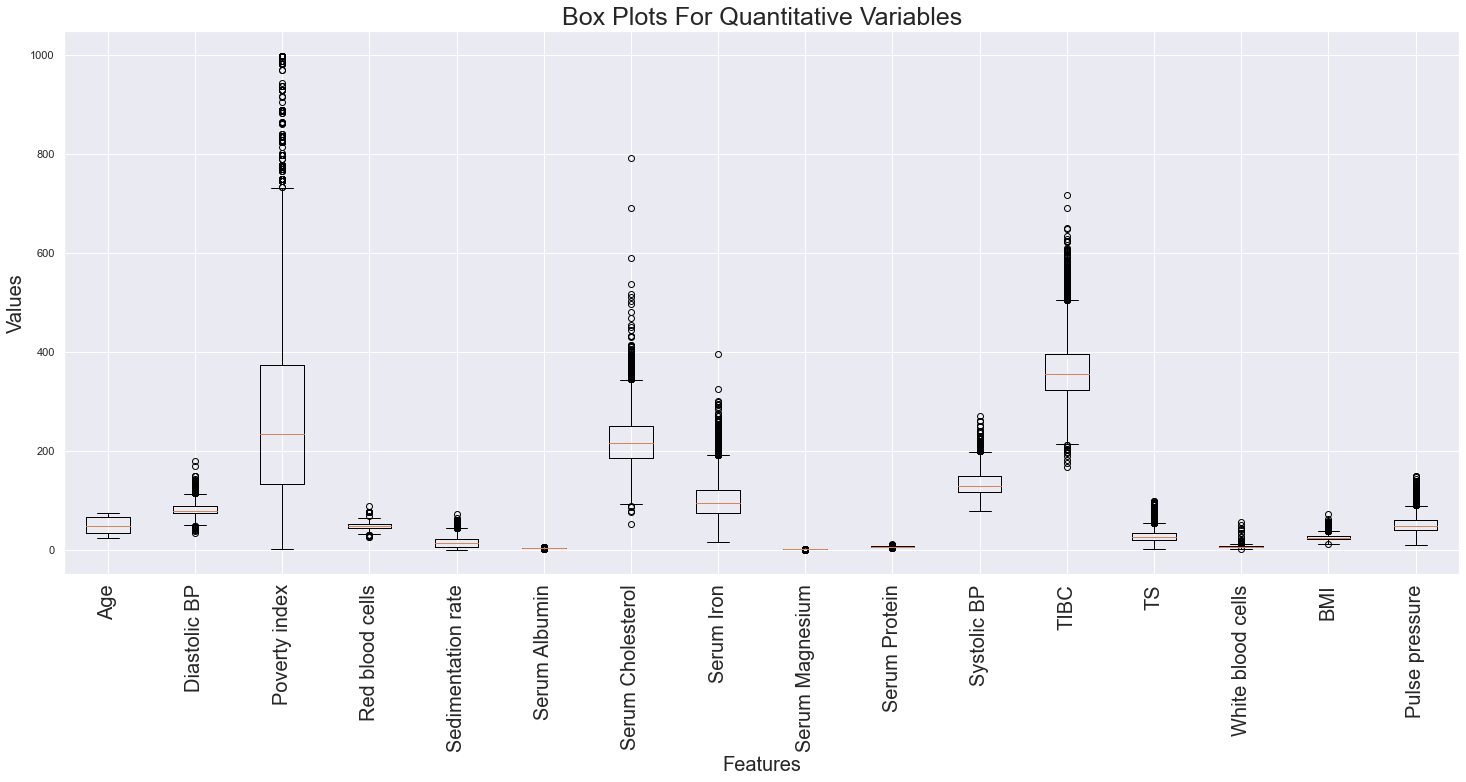

In [48]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,1,1)
ax1.boxplot(df[quantitative_variables])
ax1.set_xticklabels(quantitative_variables, rotation='vertical', fontsize = "20")
ax1.set_xlabel("Features", fontsize = "20")
ax1.set_ylabel("Values", fontsize = "20")
ax1.set_title("Box Plots For Quantitative Variables",  fontsize = "25")

## Visualizing outliers for each feature 

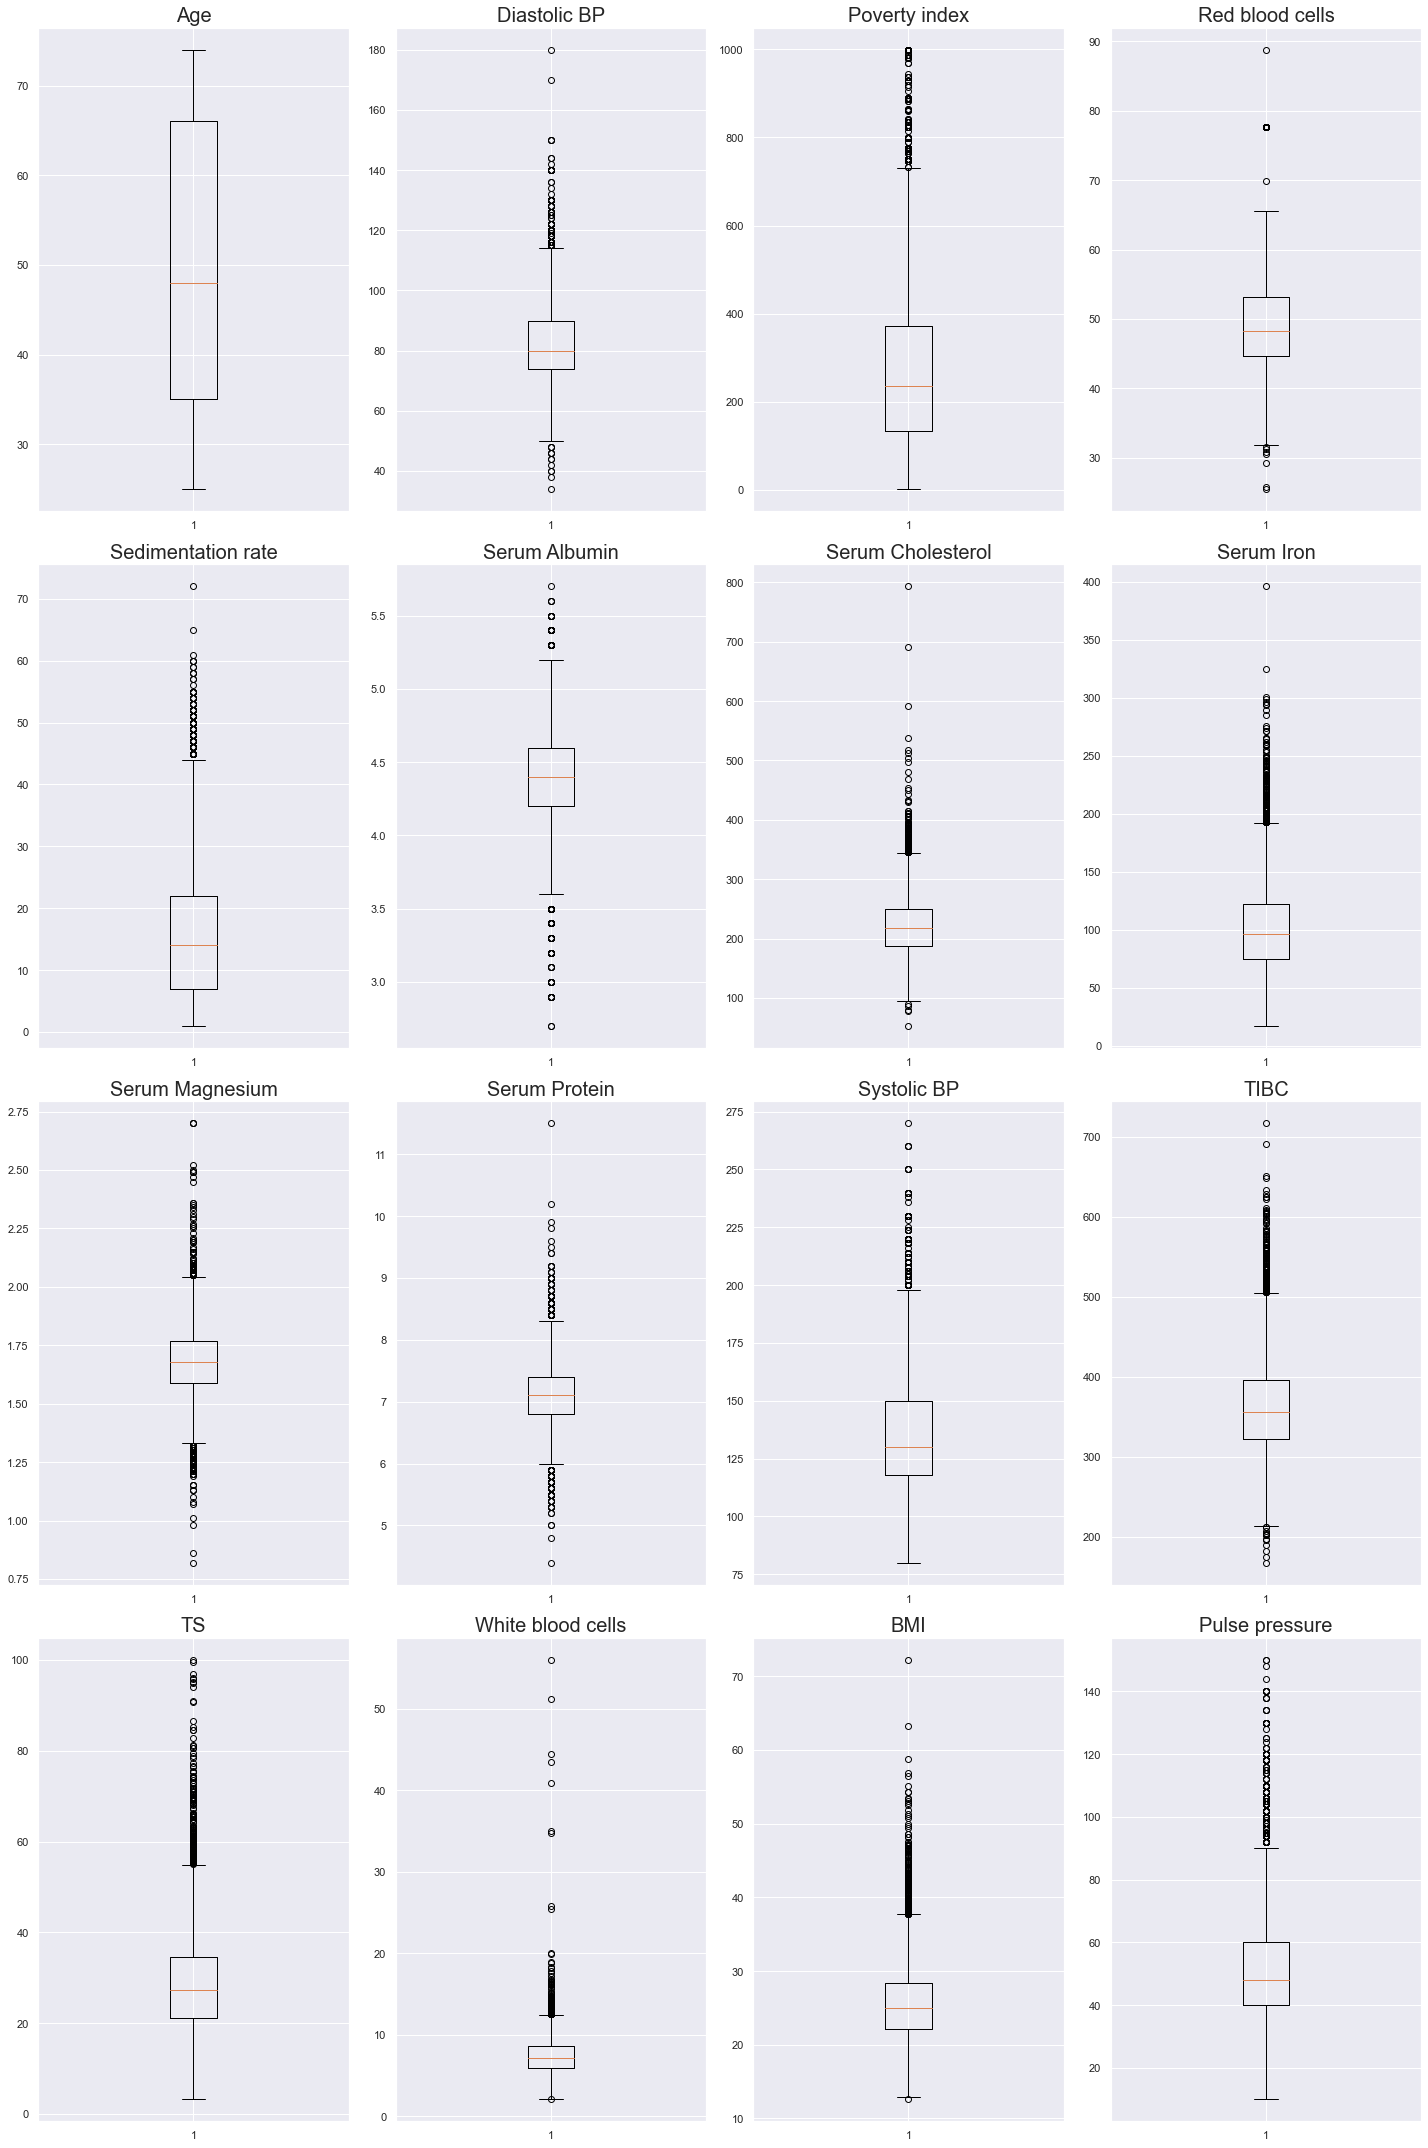

In [49]:
num_features = len(df.columns)

# Determine the number of rows and columns for subplots
num_rows = 4
num_cols = 4 

# Create the subplots
fig2, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

# Iterate over the features and create subplots
for i, feature in enumerate(quantitative_variables):
    # Calculate the subplot position
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(df[feature])
    axes[row, col].set_title(feature, fontsize = "20")
# Adjust the spacing between subplots
fig2.tight_layout()

Since we found many outliers we cannot just drop them easily , outliers maybe the most interessting data points in the whole dataset we need to find out whether those outliers are a wrong data entry (a non logical value) to safely drop them, or they represent rare events that we should give some attention

In [50]:
df.describe()

Age  Diastolic BP  Poverty index         Race  Red blood cells  \
count  8579.000000   8579.000000    8579.000000  8579.000000      8579.000000   
mean     49.273692     83.137195     290.015037     1.192563        51.962268   
std      15.896873     13.265548     223.057351     0.423693        11.815828   
min      25.000000     34.000000       2.000000     1.000000        25.500000   
25%      35.000000     74.000000     134.000000     1.000000        44.600000   
50%      48.000000     80.000000     235.000000     1.000000        48.200000   
75%      66.000000     90.000000     373.000000     1.000000        53.200000   
max      74.000000    180.000000     999.000000     3.000000        88.800000   

       Sedimentation rate  Serum Albumin  Serum Cholesterol   Serum Iron  \
count         8579.000000     8579.00000        8579.000000  8579.000000   
mean            16.024362        4.36805         221.529176   101.247931   
std             11.450431        0.33229          49.752230    37.233160   
min              1.000000        2.70000          53.000000    17.000000   
25%              7.000000        4.20000         187.000000    75.000000   
50%             14.000000        4.40000         217.000000    96.000000   
75%             22.000000        4.60000         250.000000   122.000000   
max             72.000000        5.70000         793.000000   396.000000   

       Serum Magnesium  Serum Protein          Sex  Systolic BP         TIBC  \
count      8579.000000    8579.000000  8579.000000  8579.000000  8579.000000   
mean          1.682035       7.107192     1.611143   134.444224   363.074135   
std           0.145074       0.507228     0.487519    24.860497    58.712427   
min           0.820000       4.400000     1.000000    80.000000   168.000000   
25%           1.590000       6.800000     1.000000   118.000000   323.000000   
50%           1.680000       7.100000     2.000000   130.000000   356.000000   
75%           1.770000       7.400000     2.000000   150.000000   396.000000   
max           2.700000      11.500000     2.000000   270.000000   717.000000   

                TS  White blood cells          BMI  Pulse pressure  \
count  8579.000000        8579.000000  8579.000000     8579.000000   
mean     28.540553           7.455251    25.661214       51.307029   
std      11.178432           2.297578     5.151157       18.211419   
min       3.200000           2.100000    12.585333       10.000000   
25%      21.050000           6.000000    22.094772       40.000000   
50%      27.200000           7.200000    24.920509       48.000000   
75%      34.600000           8.600000    28.337017       60.000000   
max     100.000000          56.000000    72.218113      150.000000   

             death  
count  8579.000000  
mean      0.382912  
std       0.486125  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

## Dealing with outliers using IQR Method

In [51]:
def remove_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5 * iqr  

    lower_bound = q1 - threshold
    upper_bound = q3 + threshold

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data
for q in df[quantitative_variables]:
    df = remove_outliers_iqr(df, q) 

In [52]:
df

Age  Diastolic BP  Poverty index  Race  Red blood cells  \
545   47.0          80.0           25.0   2.0             48.0   
547   57.0          82.0          129.0   2.0             43.3   
548   74.0          80.0           63.0   2.0             47.3   
550   39.0          90.0          258.0   2.0             46.9   
552   42.0          75.0          258.0   1.0             41.1   
...    ...           ...            ...   ...              ...   
8573  29.0          74.0          351.0   1.0             50.9   
8574  26.0          76.0          491.0   1.0             46.6   
8575  69.0          82.0          316.0   1.0             48.0   
8576  34.0          80.0          187.0   1.0             47.3   
8578  70.0          70.0          204.0   1.0             48.8   

      Sedimentation rate  Serum Albumin  Serum Cholesterol  Serum Iron  \
545                 30.0            4.4              228.0        70.0   
547                 22.0            4.4              249.0        95.0   
548                  8.0            4.4              141.1       131.0   
550                  4.0            4.4              217.0       102.0   
552                 18.0            5.0              211.0       111.0   
...                  ...            ...                ...         ...   
8573                18.0            4.5              201.1        29.0   
8574                 9.0            4.7              137.0        90.0   
8575                18.0            4.7              301.0        98.0   
8576                10.0            4.5              161.0        95.0   
8578                 9.0            4.4              205.0       124.0   

      Serum Magnesium  Serum Protein  Sex  Systolic BP   TIBC    TS  \
545              1.56            8.0  2.0        120.0  466.0  15.0   
547              1.55            7.7  2.0        150.0  362.0  26.2   
548              1.81            7.5  1.0        142.0  315.0  41.6   
550              1.80            7.0  2.0        120.0  401.0  25.4   
552              1.69            6.8  2.0        115.0  468.0  23.7   
...               ...            ...  ...          ...    ...   ...   
8573             1.61            7.9  2.0        114.0  369.0   7.9   
8574             1.39            7.4  1.0        104.0  316.0  28.5   
8575             2.02            6.7  2.0        130.0  334.0  29.3   
8576             1.54            6.9  2.0        110.0  381.0  24.9   
8578             1.91            6.8  1.0        132.0  398.0  31.2   

      White blood cells        BMI  Pulse pressure  death  
545                 8.1  31.797495            40.0    1.0  
547                 6.1  33.373154            68.0    1.0  
548                 3.8  27.259976            62.0    0.0  
550                 6.1  27.850838            30.0    0.0  
552                 6.0  26.666944            40.0    0.0  
...                 ...        ...             ...    ...  
8573                6.7  25.823936            40.0    0.0  
8574               10.7  21.468805            28.0    1.0  
8575                7.1  23.090226            48.0    0.0  
8576                5.4  25.797680            30.0    0.0  
8578                7.5  28.763104            62.0    1.0  

[5384 rows x 19 columns]

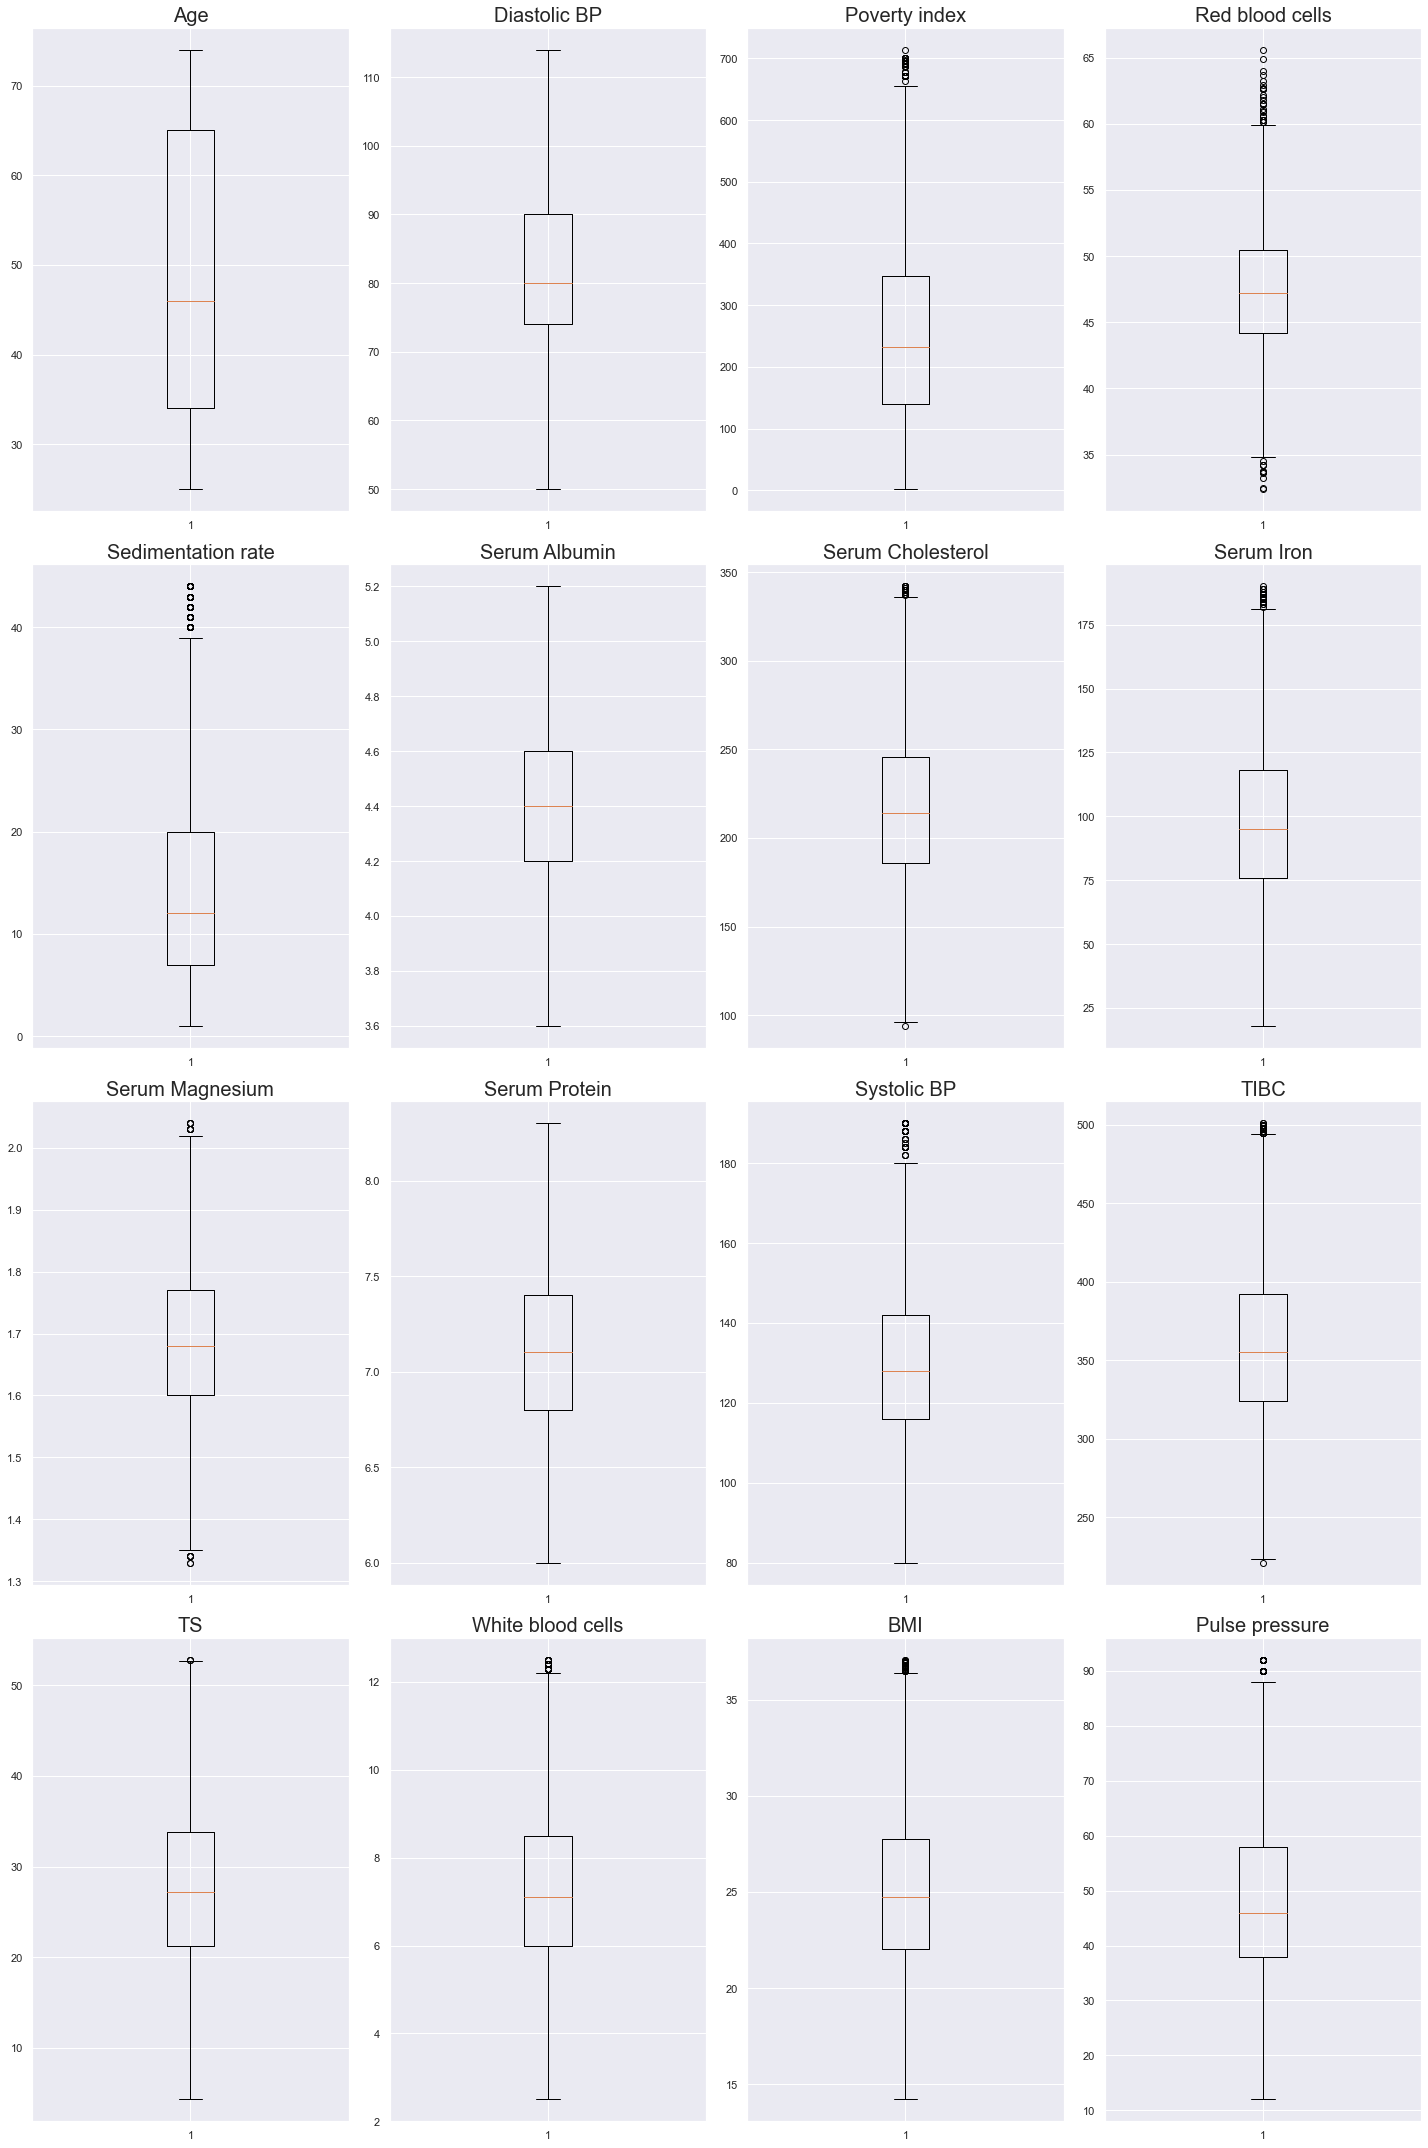

In [53]:
fig3, axes3 = plt.subplots(num_rows, num_cols, figsize=(20, 30))

# Iterate over the features and create subplots
for i, feature in enumerate(quantitative_variables):
    # Calculate the subplot position
    row = i // num_cols
    col = i % num_cols
    axes3[row, col].boxplot(df[feature])
    axes3[row, col].set_title(feature, fontsize = "20")
# Adjust the spacing between subplots
fig3.tight_layout()

## Trying Feature Transformations

In [54]:
def plot_dist(row,col, data, Transform=[]):
    fig1, ax1 = plt.subplots(row, col, figsize=(40, 30))
    for i, feature in enumerate(data.columns):
        row = i // num_cols
        col = i % num_cols
        if len(Transform) == 0:
            sns.histplot(df[feature], kde=True, ax=ax1[row, col])
        else:
            sns.histplot(df[feature].agg(Transform), kde=True, ax=ax1[row, col])
        
        ax1[row, col].set_title(f"Distribution of {feature}", fontsize="25")

    fig1.tight_layout()

### No Transformations

None


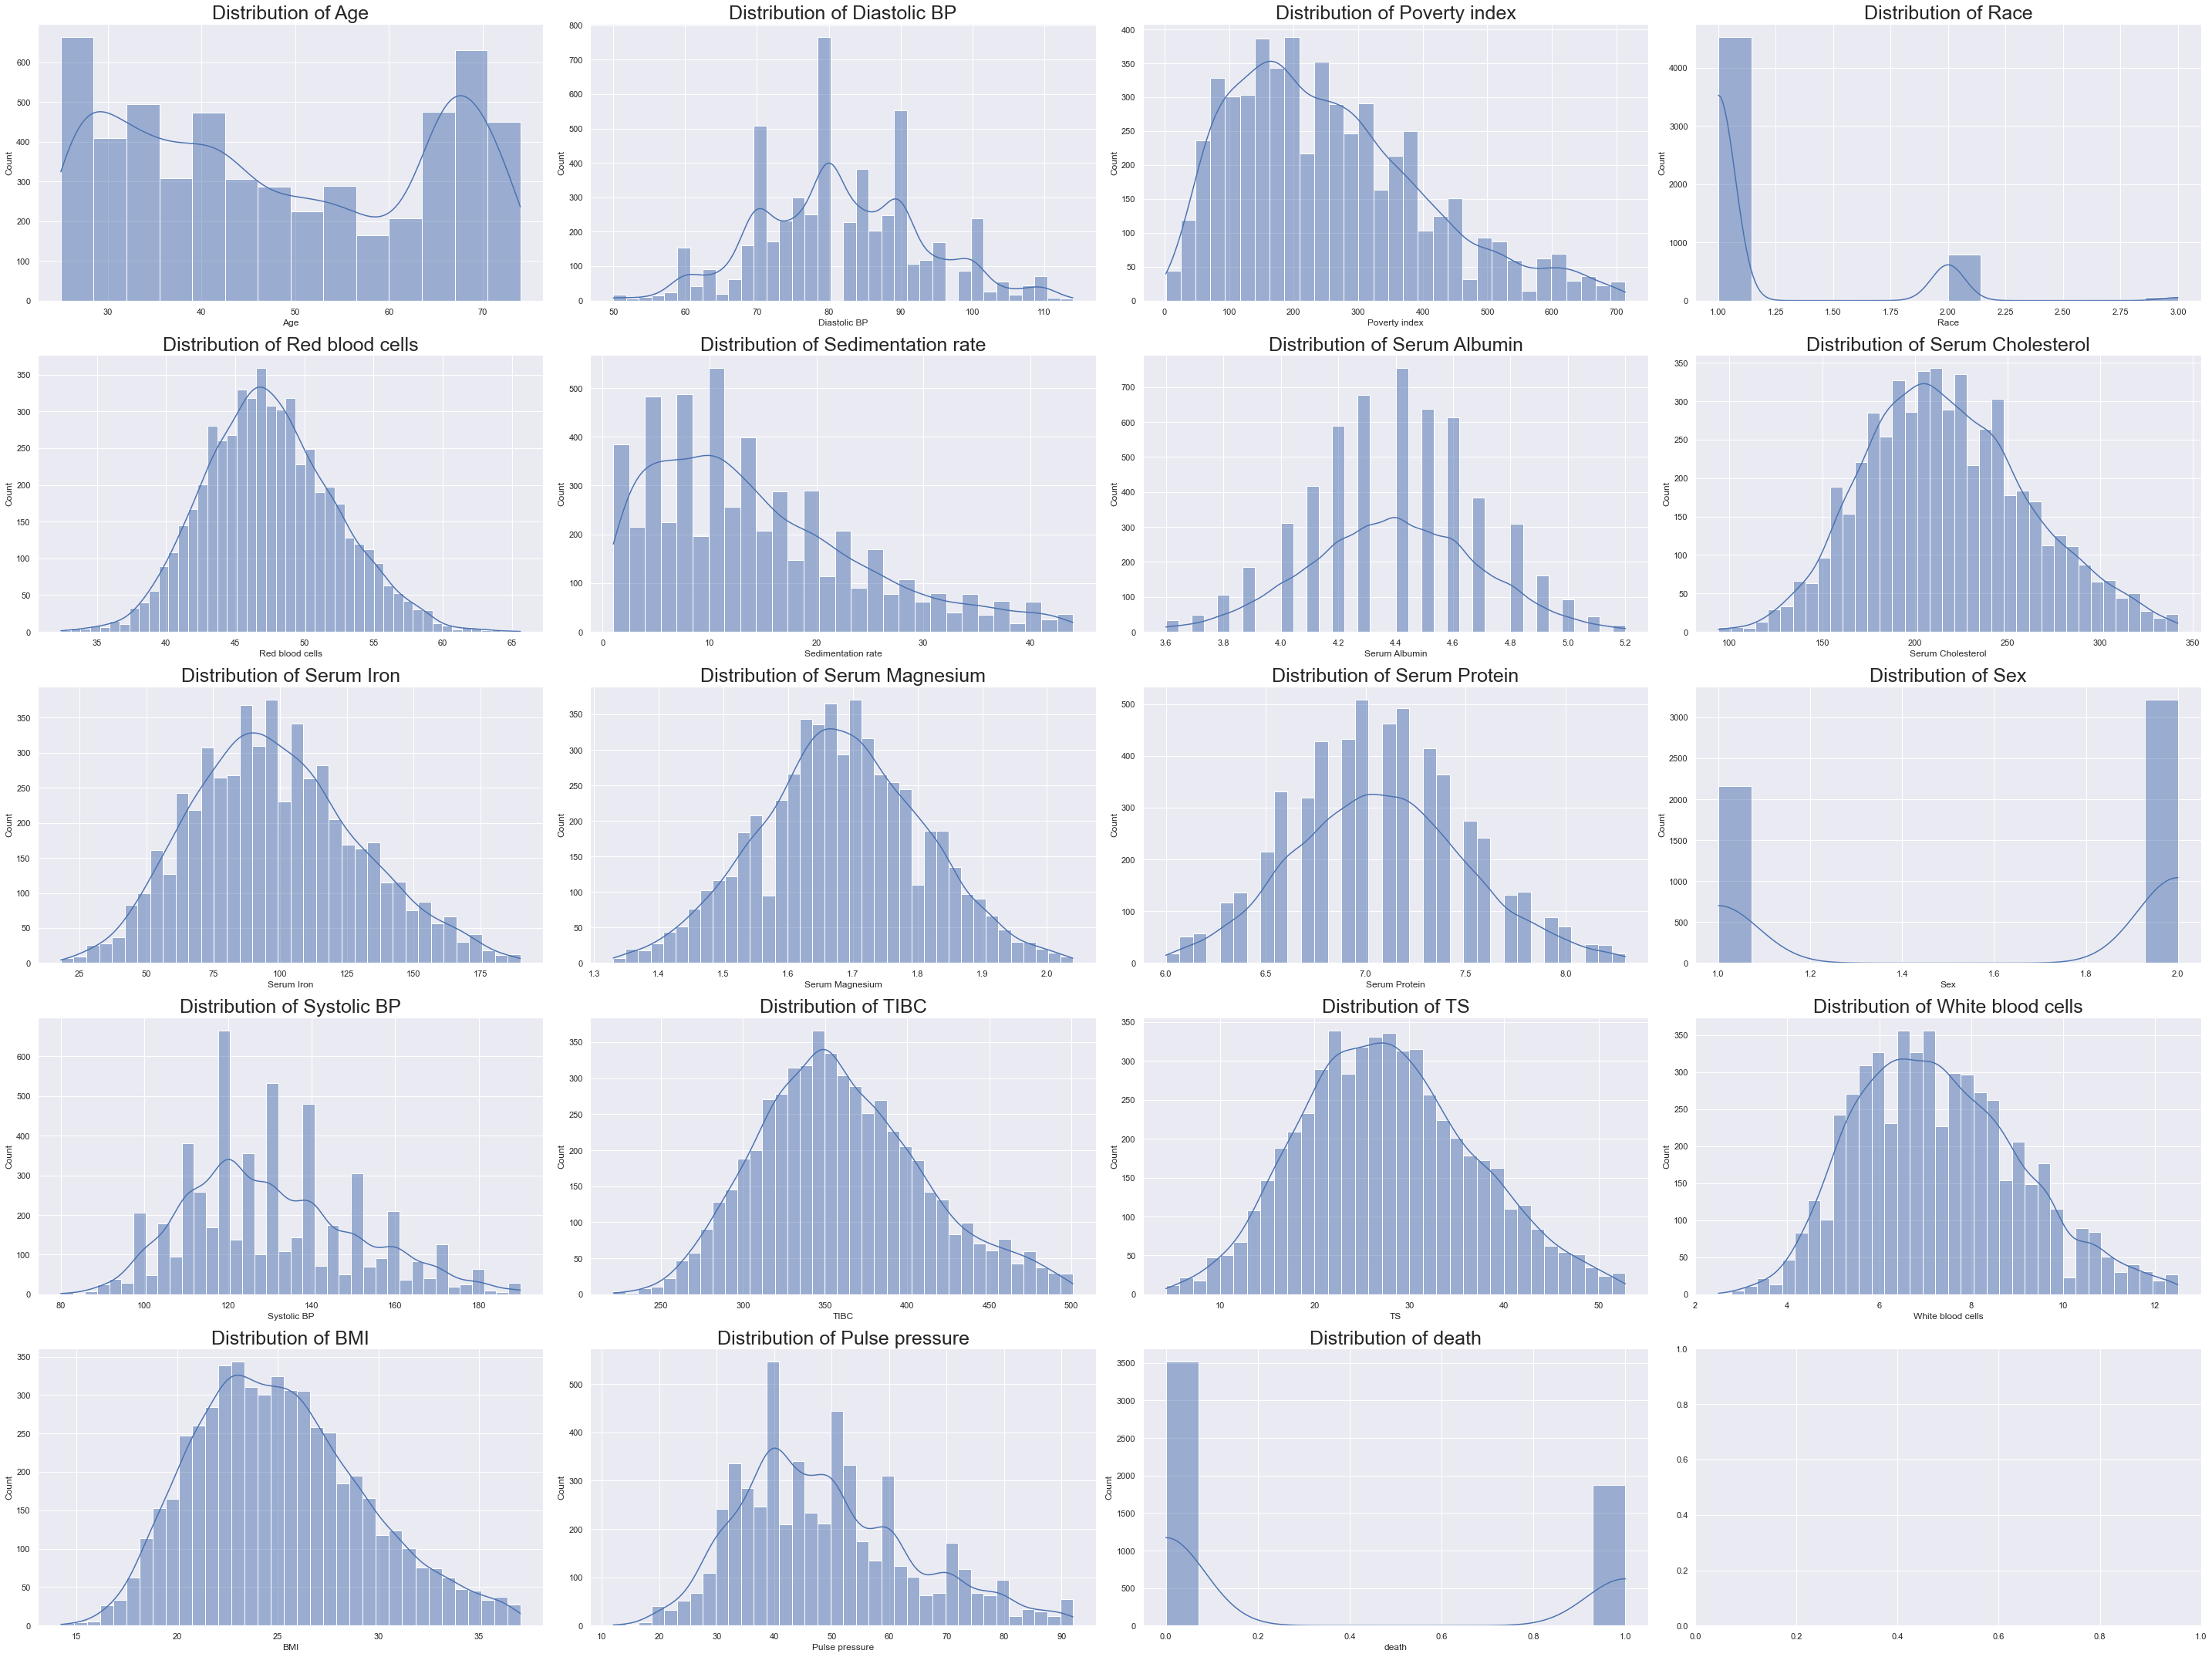

In [55]:
# No transformation or Normalization
print(plot_dist(5, 4, df))

### Square root Transformation , log Transformation

None


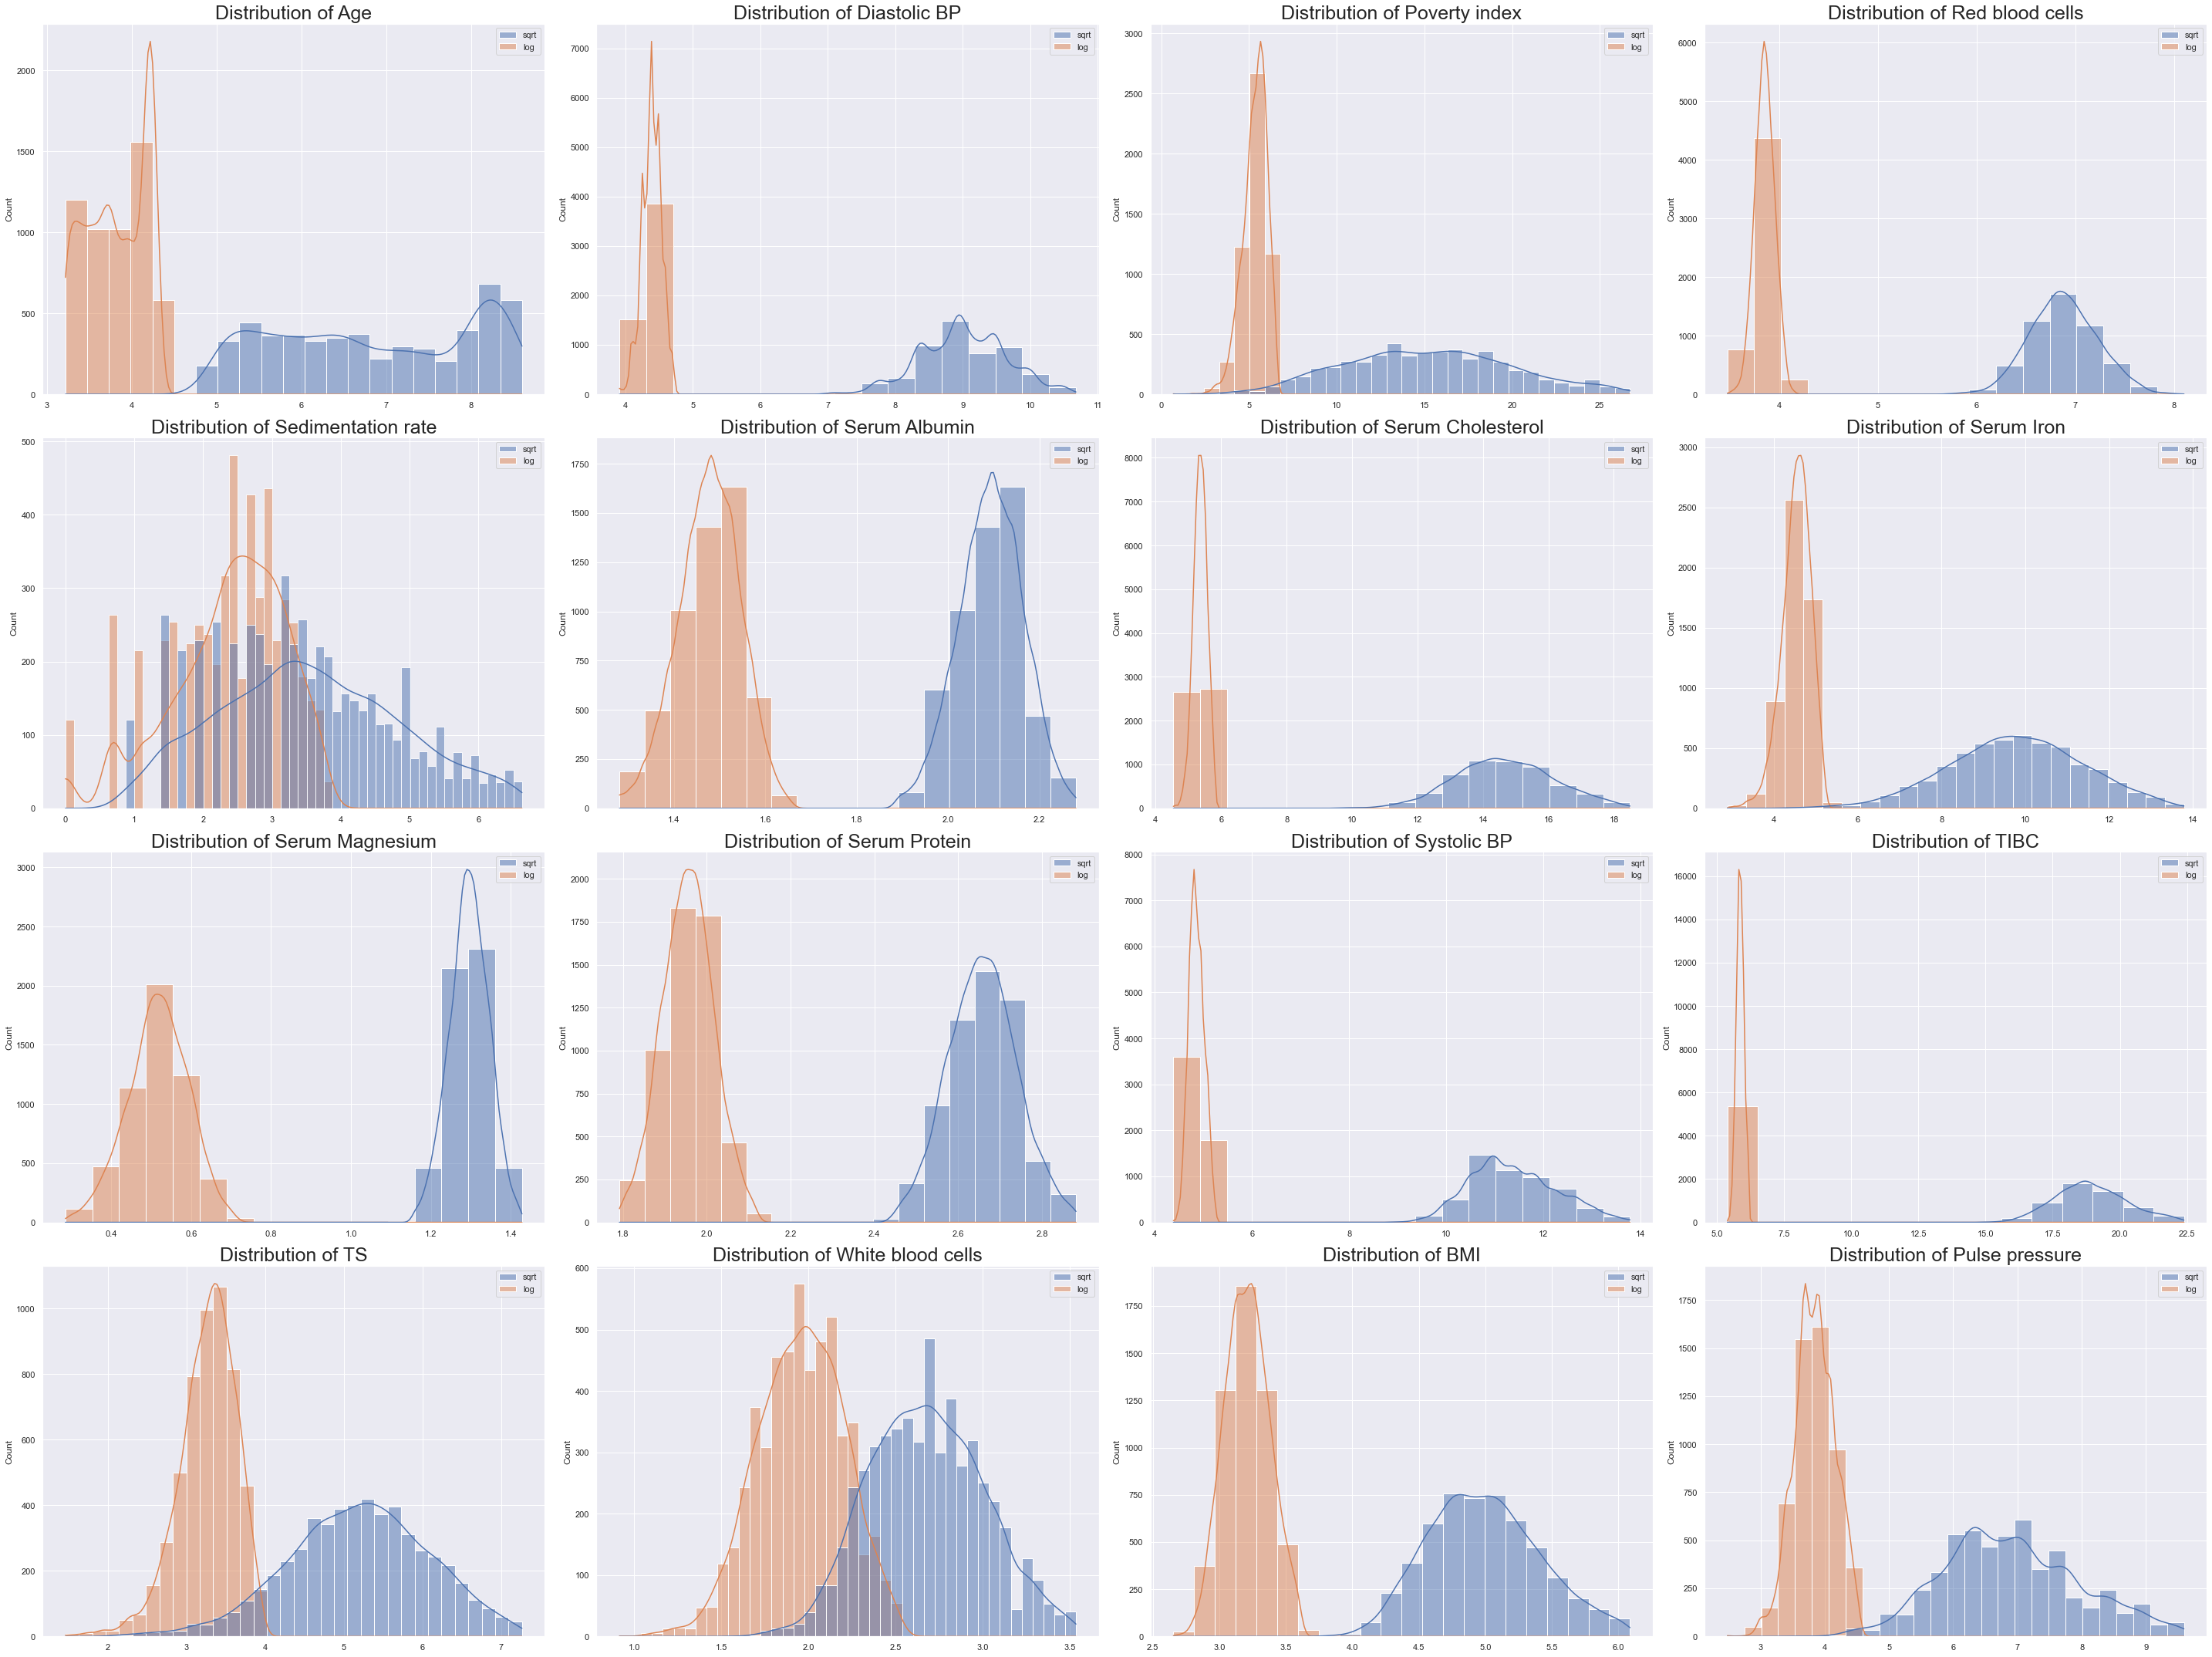

In [56]:
# log versus sqrt transformation
print(plot_dist(4,4,df[quantitative_variables], Transform=["sqrt", "log"]))

### Boxcox Transformation

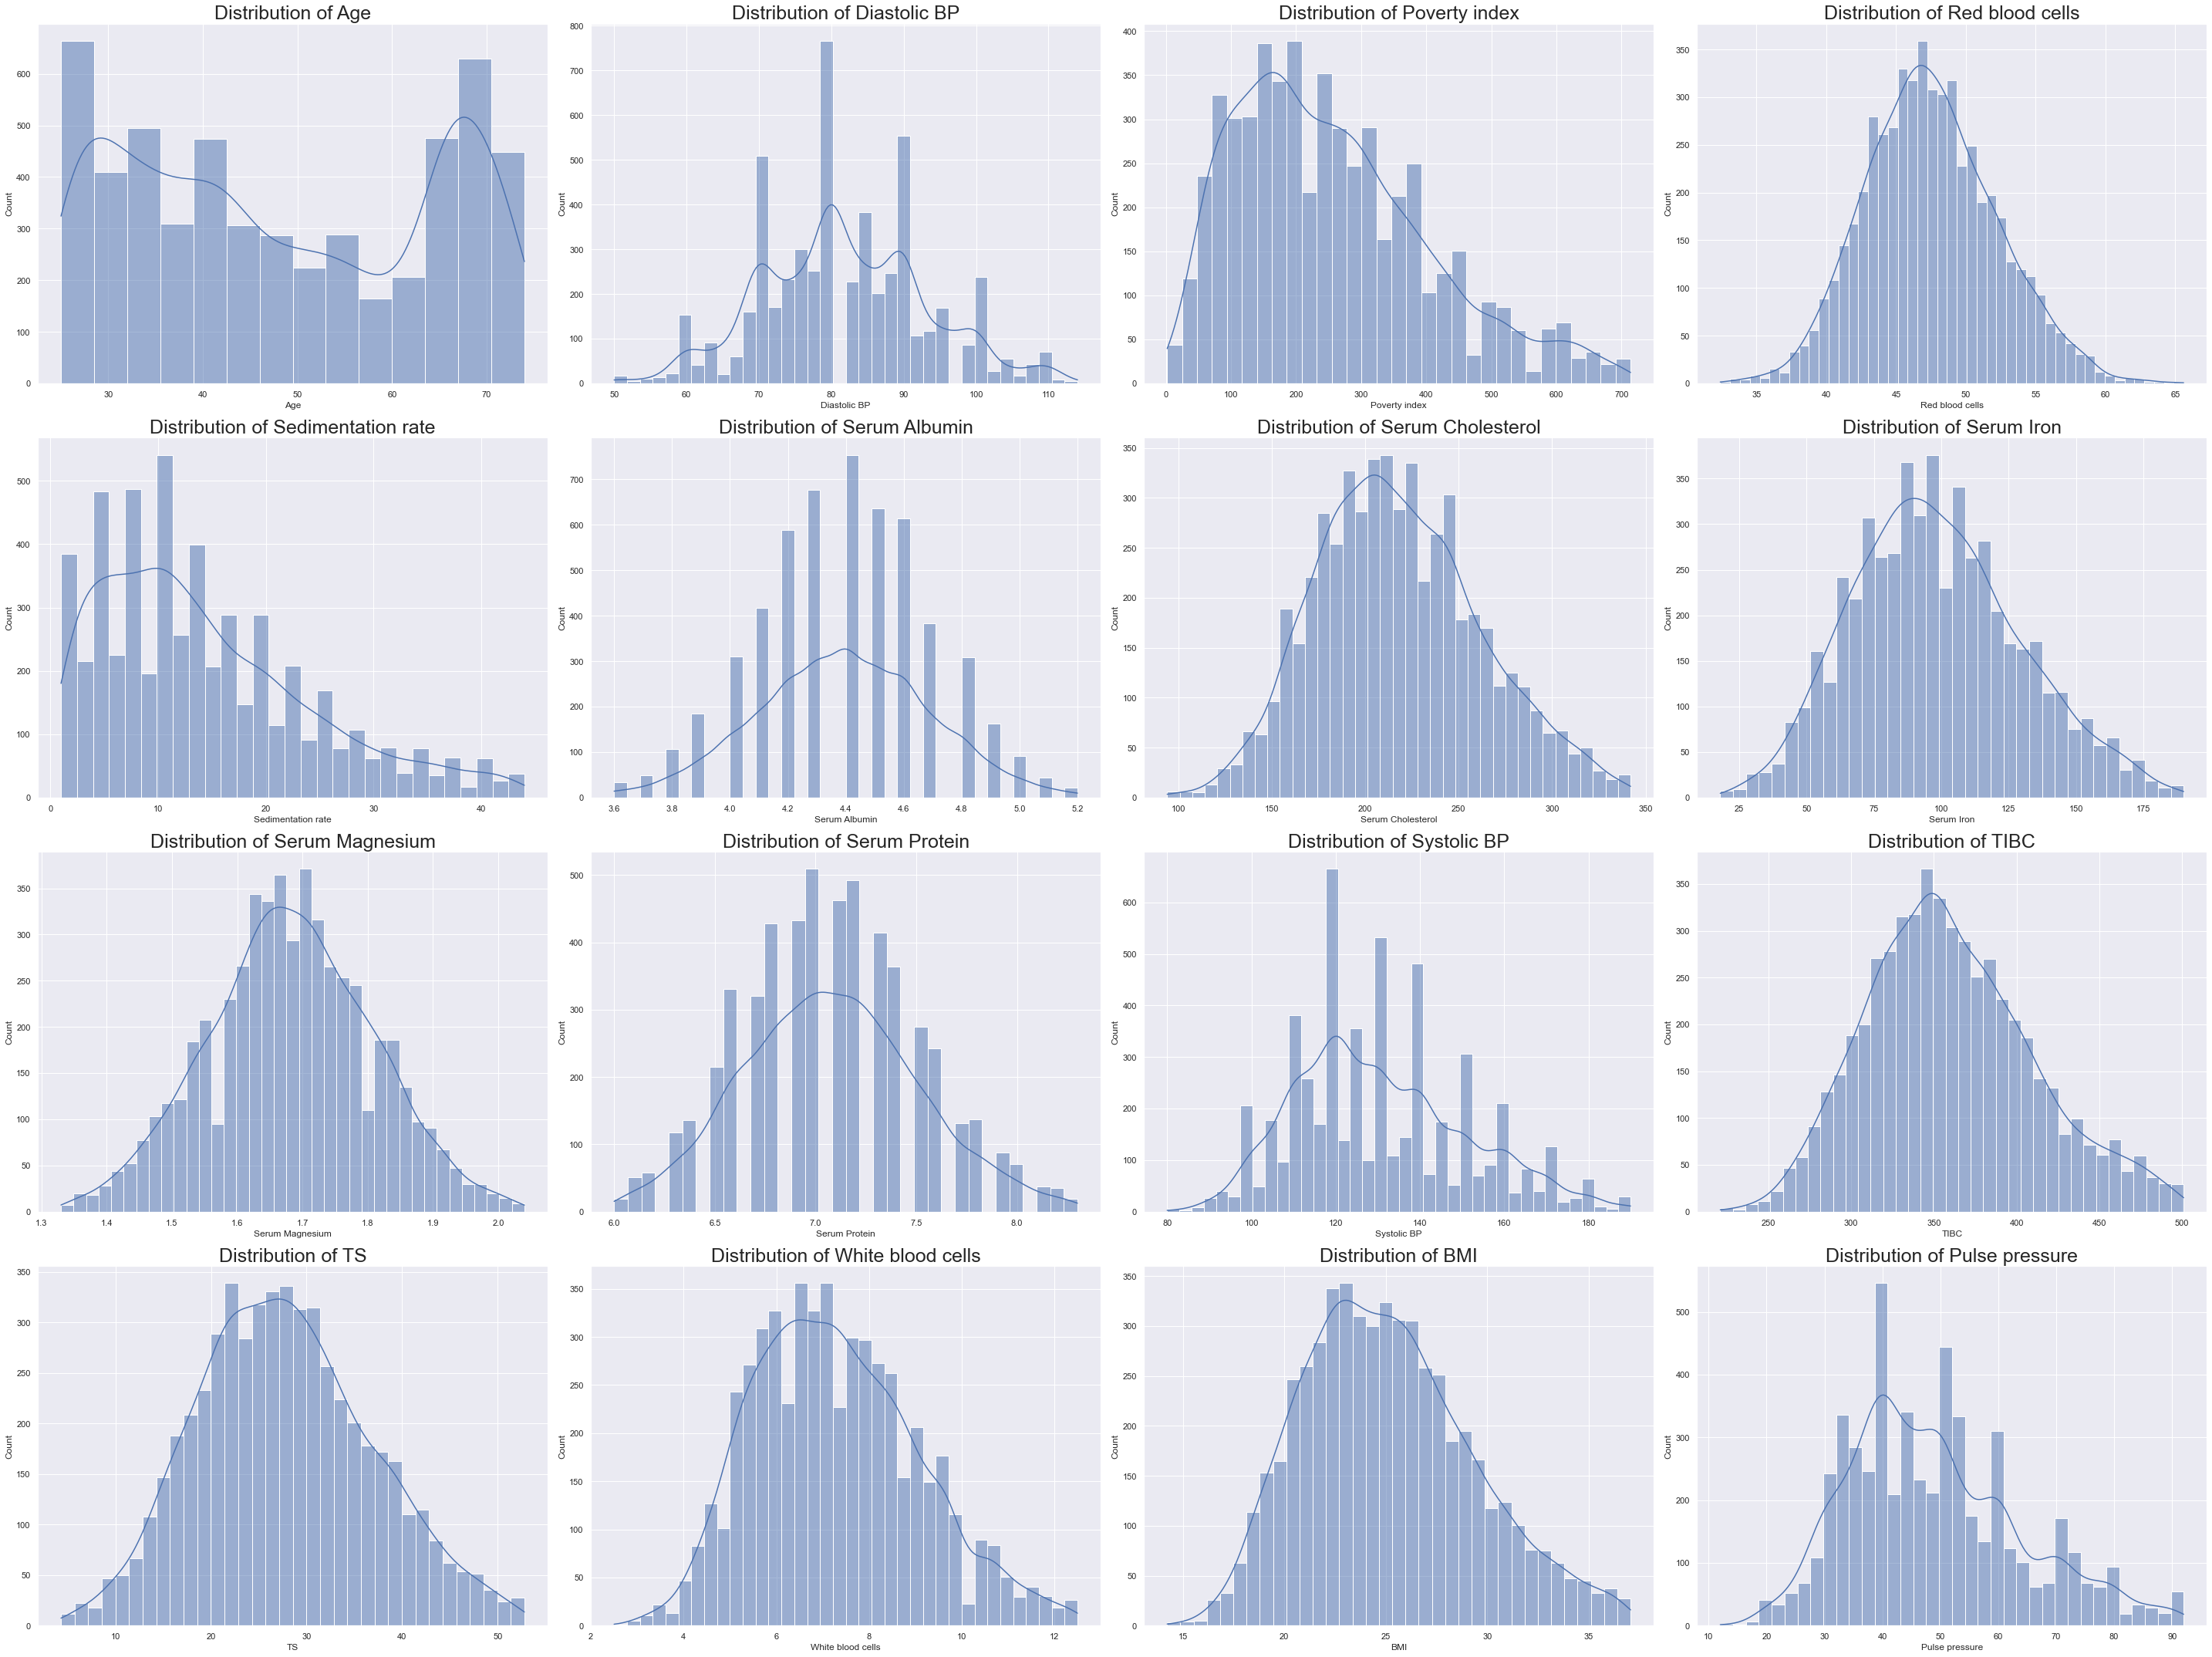

In [57]:
def bcox(data):
    trans,_ = boxcox(data)
    return trans
df2 = df.copy(deep=True)
for feature in quantitative_variables:
    trans_feature = bcox(df[feature])
    df2[feature] = trans_feature
plot_dist(4,4,df2[quantitative_variables])

BOXCOX Transformation resulted in a good visual approximation for a normal distribution so we proceed with its transformed features

## Visualizing Categorical Data

In [58]:
df2[categorical_variables]

Race  Sex  death
545    2.0  2.0    1.0
547    2.0  2.0    1.0
548    2.0  1.0    0.0
550    2.0  2.0    0.0
552    1.0  2.0    0.0
...    ...  ...    ...
8573   1.0  2.0    0.0
8574   1.0  1.0    1.0
8575   1.0  2.0    0.0
8576   1.0  2.0    0.0
8578   1.0  1.0    1.0

[5384 rows x 3 columns]

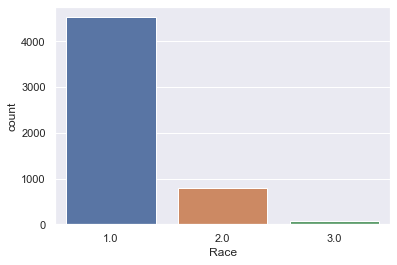

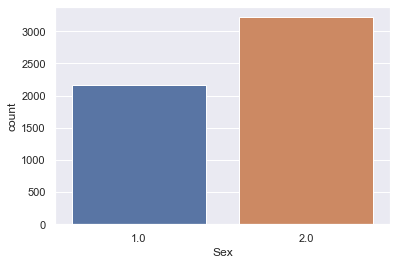

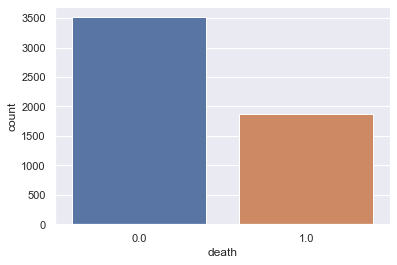

In [59]:
for feature in categorical_variables:
    sns.countplot(x=feature, data=df)
    plt.show()

## Calculating The Measures Of Central Tendancy and Dispersion On Transformed Data

In [60]:
disc = df2.describe()
disc

Age  Diastolic BP  Poverty index         Race  Red blood cells  \
count  5384.000000   5384.000000    5384.000000  5384.000000      5384.000000   
mean      8.952745     21.778062      19.744257     1.171062         6.464346   
std       1.534053      1.983321       5.695996     0.407858         0.258175   
min       6.455890     15.825606       0.800095     1.000000         5.523133   
25%       7.609171     20.476726      15.778364     1.000000         6.288502   
50%       8.886755     21.539725      19.955079     1.000000         6.458033   
75%      10.546131     23.243277      23.876263     1.000000         6.635405   
max      11.228807     27.049004      32.808171     3.000000         7.350761   

       Sedimentation rate  Serum Albumin  Serum Cholesterol   Serum Iron  \
count         5384.000000    5384.000000        5384.000000  5384.000000   
mean             3.987047       3.750688          22.316061    26.406975   
std              1.839072       0.347005           2.240542     5.685689   
min              0.000000       2.829415          14.737637     8.178013   
25%              2.797466       3.524685          20.769396    22.528184   
50%              3.977324       3.758926          22.252486    26.152807   
75%              5.322908       3.994325          23.821001    30.195462   
max              7.939940       4.707030          27.940557    41.267149   

       Serum Magnesium  Serum Protein          Sex  Systolic BP         TIBC  \
count      5384.000000    5384.000000  5384.000000  5384.000000  5384.000000   
mean          0.663062       2.015137     1.597883     2.220451     5.351574   
std           0.120478       0.065468     0.490371     0.024423     0.115964   
min           0.325251       1.842137     1.000000     2.138099     4.953312   
25%           0.585446       1.974659     1.000000     2.204022     5.272640   
50%           0.661689       2.020488     2.000000     2.219988     5.348325   
75%           0.747042       2.064477     2.000000     2.236190     5.430192   
max           1.000659       2.186769     2.000000     2.278387     5.631659   

                TS  White blood cells          BMI  Pulse pressure  \
count  5384.000000        5384.000000  5384.000000     5384.000000   
mean     13.324657           2.763455     2.729180        5.711914   
std       3.536027           0.471800     0.119540        0.649528   
min       2.558651           1.069052     2.321031        3.188769   
25%      10.903828           2.439336     2.645313        5.274387   
50%      13.286609           2.751028     2.728999        5.667157   
75%      15.736930           3.103883     2.811677        6.163557   
max      22.123776           3.934029     3.012940        7.220139   

             death  
count  5384.000000  
mean      0.347325  
std       0.476164  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [61]:
def calculate_mode(x):
    return x.mode().iat[0]

def calculate_range(y):
    return y.max() - y.min()

In [62]:
measures = []
for feature in quantitative_variables:
    measures.append(df2[feature].agg(["mean", "median",calculate_mode , "var", "std", calculate_range])
                   )
for item in measures:
    print(item)
    print("\n")

mean                8.952745
median              8.886755
calculate_mode     10.546131
var                 2.353318
std                 1.534053
calculate_range     4.772917
Name: Age, dtype: float64


mean               21.778062
median             21.539725
calculate_mode     21.539725
var                 3.933561
std                 1.983321
calculate_range    11.223399
Name: Diastolic BP, dtype: float64


mean               19.744257
median             19.955079
calculate_mode     21.510369
var                32.444369
std                 5.695996
calculate_range    32.008077
Name: Poverty index, dtype: float64


mean               6.464346
median             6.458033
calculate_mode     6.435906
var                0.066654
std                0.258175
calculate_range    1.827628
Name: Red blood cells, dtype: float64


mean               3.987047
median             3.977324
calculate_mode     3.552862
var                3.382185
std                1.839072
calculate_range    7.939940

## Standardizing  The Transformed Features

In [63]:
means = [measure[0] for measure in measures]
stds = [measure[4] for measure in measures]
print(means)
print(stds)

[8.952744965875205, 21.77806249376454, 19.74425718938299, 6.46434615126347, 3.9870465803577106, 3.750687678216553, 22.31606141991324, 26.406974590252617, 0.6630621153848809, 2.015137330400816, 2.2204511577601713, 5.351573639741873, 13.324656750777303, 2.763454720499306, 2.729180453993352, 5.7119137644228815]
[1.5340527278268363, 1.983320700737592, 5.6959958367780805, 0.25817524241615974, 1.8390717851190754, 0.34700500366687065, 2.240541702223681, 5.685689441451483, 0.12047771988469544, 0.06546784495410227, 0.024423316224608776, 0.11596384499480845, 3.536026575806012, 0.4717996823198465, 0.1195403742963663, 0.6495280778186823]


In [64]:
stndrd_trns = (df2[quantitative_variables] - disc[quantitative_variables].iloc[1,:]) / disc[quantitative_variables].iloc[2,:]
stndrd_trns

Age  Diastolic BP  Poverty index  Red blood cells  \
545   0.020079     -0.120171      -2.304402         0.145336   
547   0.610437      0.054894      -0.800596        -0.884622   
548   1.483692     -0.120171      -1.580777        -0.003111   
550  -0.510027      0.738768       0.202758        -0.088680   
552  -0.304107     -0.565642       0.202758        -1.395850   
...        ...           ...            ...              ...   
8573 -1.276035     -0.656140       0.746922         0.743529   
8574 -1.536690     -0.475623       1.422857        -0.153219   
8575  1.240809      0.054894       0.553564         0.145336   
8576 -0.875833     -0.120171      -0.298184        -0.003111   
8578  1.290222     -1.023115      -0.169123         0.313010   

      Sedimentation rate  Serum Albumin  Serum Cholesterol  Serum Iron  \
545             1.408720       0.023742           0.284585   -0.895537   
547             0.878106       0.023742           0.734657   -0.044703   
548            -0.499084       0.023742          -1.879487    1.045193   
550            -1.195601       0.023742           0.039622    0.177887   
552             0.564484       2.068353          -0.096904    0.455878   
...                  ...            ...                ...         ...   
8573            0.564484       0.362520          -0.326964   -2.606669   
8574           -0.362848       1.042510          -1.997984   -0.207456   
8575            0.564484       1.042510           1.765522    0.051416   
8576           -0.236089       0.362520          -1.329829   -0.044703   
8578           -0.362848       0.023742          -0.235600    0.843020   

      Serum Magnesium  Serum Protein  Systolic BP      TIBC        TS  \
545         -0.961797       2.021751    -0.444789  1.903896 -1.442828   
547         -1.041311       1.399674     0.984337  0.111204 -0.119809   
548          1.010789       0.971768     0.644426 -0.882278  1.452263   
550          0.932419      -0.148378    -0.444789  0.839278 -0.207920   
552          0.067500      -0.618300    -0.731346  1.934171 -0.397883   
...               ...            ...          ...       ...       ...   
8573        -0.564962       1.816942    -0.790724  0.247673 -2.438801   
8574        -2.320581       0.753649    -1.426929 -0.859586  0.129281   
8575         2.647195      -0.858308     0.081792 -0.463340  0.214538   
8576        -1.120875      -0.381688    -1.035616  0.475518 -0.263397   
8578         1.792210      -0.618300     0.180432  0.785924  0.414369   

      White blood cells       BMI  Pulse pressure  
545            0.516890  1.486775       -0.513445  
547           -0.623719  1.768700        1.239914  
548           -2.306050  0.579790        0.921631  
550           -0.623719  0.706977       -1.391574  
552           -0.686985  0.449038       -0.513445  
...                 ...       ...             ...  
8573          -0.258049  0.257541       -0.513445  
8574           1.744798 -0.855992       -1.595020  
8575          -0.026339 -0.414493        0.068862  
8576          -1.082282  0.251467       -1.391574  
8578           0.196761  0.897614        0.921631  

[5384 rows x 16 columns]

### Calculating For the original data

In [65]:
stats = df[quantitative_variables].describe()
stats

Age  Diastolic BP  Poverty index  Red blood cells  \
count  5384.000000   5384.000000    5384.000000      5384.000000   
mean     48.320765     81.691679     254.689264        47.489413   
std      15.899117     11.443893     149.687885         4.705737   
min      25.000000     50.000000       2.000000        32.400000   
25%      34.000000     74.000000     140.000000        44.200000   
50%      46.000000     80.000000     233.000000        47.200000   
75%      65.000000     90.000000     347.000000        50.500000   
max      74.000000    114.000000     714.000000        65.600000   

       Sedimentation rate  Serum Albumin  Serum Cholesterol   Serum Iron  \
count         5384.000000    5384.000000        5384.000000  5384.000000   
mean            14.307764       4.391902         217.752303    98.283804   
std              9.841914       0.295683          44.254173    31.123117   
min              1.000000       3.600000          94.000000    18.000000   
25%              7.000000       4.200000         186.000000    76.000000   
50%             12.000000       4.400000         214.000000    95.000000   
75%             20.000000       4.600000         246.000000   118.000000   
max             44.000000       5.200000         342.000000   190.000000   

       Serum Magnesium  Serum Protein  Systolic BP         TIBC           TS  \
count      5384.000000    5384.000000  5384.000000  5384.000000  5384.000000   
mean          1.681909       7.077340   130.502229   360.033247    27.758544   
std           0.126697       0.436487    20.397663    50.703058     9.178221   
min           1.330000       6.000000    80.000000   221.000000     4.300000   
25%           1.600000       6.800000   116.000000   324.000000    21.200000   
50%           1.680000       7.100000   128.000000   355.000000    27.200000   
75%           1.770000       7.400000   142.000000   392.000000    33.800000   
max           2.040000       8.300000   190.000000   501.000000    52.800000   

       White blood cells          BMI  Pulse pressure  
count        5384.000000  5384.000000     5384.000000  
mean            7.293258    25.119266       48.810550  
std             1.787862     4.219595       15.010188  
min             2.500000    14.227712       12.000000  
25%             6.000000    22.021129       38.000000  
50%             7.100000    24.729935       46.000000  
75%             8.500000    27.771702       58.000000  
max            12.500000    37.053958       92.000000

In [66]:
stndrd_orgnl = (df[quantitative_variables] - stats.iloc[1,:])/stats.iloc[2,:]
stndrd_orgnl

Age  Diastolic BP  Poverty index  Red blood cells  \
545  -0.083072     -0.147824      -1.534455         0.108503   
547   0.545894      0.026942      -0.839676        -0.890278   
548   1.615136     -0.147824      -1.280593        -0.040252   
550  -0.586244      0.726005       0.022118        -0.125254   
552  -0.397554     -0.584738       0.022118        -1.357792   
...        ...           ...            ...              ...   
8573 -1.215210     -0.672121       0.643410         0.724772   
8574 -1.403900     -0.497355       1.578690        -0.189006   
8575  1.300653      0.026942       0.409591         0.108503   
8576 -0.900727     -0.147824      -0.452203        -0.040252   
8578  1.363550     -1.021652      -0.338633         0.278508   

      Sedimentation rate  Serum Albumin  Serum Cholesterol  Serum Iron  \
545             1.594429       0.027388           0.231565   -0.908772   
547             0.781579       0.027388           0.706096   -0.105510   
548            -0.640908       0.027388          -1.732092    1.051186   
550            -1.047333       0.027388          -0.017000    0.119403   
552             0.375154       2.056589          -0.152580    0.408577   
...                  ...            ...                ...         ...   
8573            0.375154       0.365588          -0.376288   -2.226120   
8574           -0.539302       1.041988          -1.824739   -0.266162   
8575            0.375154       1.041988           1.881126   -0.009119   
8576           -0.437696       0.365588          -1.282417   -0.105510   
8578           -0.539302       0.027388          -0.288160    0.826273   

      Serum Magnesium  Serum Protein  Systolic BP      TIBC        TS  \
545         -0.962215       2.113829    -0.514874  2.089948 -1.390089   
547         -1.041144       1.426524     0.955883  0.038790 -0.169809   
548          1.011004       0.968321     0.563681 -0.888176  1.508076   
550          0.932075      -0.177188    -0.514874  0.807974 -0.256972   
552          0.063858      -0.635391    -0.760000  2.129393 -0.442193   
...               ...            ...          ...       ...       ...   
8573        -0.567572       1.884728    -0.809025  0.176848 -2.163659   
8574        -2.304004       0.739219    -1.299278 -0.868453  0.080784   
8575         2.668508      -0.864493    -0.024622 -0.513445  0.167947   
8576        -1.120073      -0.406290    -1.005126  0.413520 -0.311449   
8578         1.800291      -0.635391     0.073429  0.748806  0.374959   

      White blood cells       BMI  Pulse pressure  
545            0.451233  1.582671       -0.586971  
547           -0.667422  1.956085        1.278428  
548           -1.953875  0.507326        0.878700  
550           -0.667422  0.647354       -1.253186  
552           -0.723355  0.366784       -0.586971  
...                 ...       ...             ...  
8573          -0.331825  0.166999       -0.586971  
8574           1.905484 -0.865121       -1.386428  
8575          -0.108094 -0.480861       -0.054000  
8576          -1.058951  0.160777       -1.253186  
8578           0.115637  0.863552        0.878700  

[5384 rows x 16 columns]

## Data Splitting 

In [67]:
Data_Transformed = df2
Features = Data_Transformed.drop("death", axis=1)
Targets = Data_Transformed["death"]
print(f"targets shape : {Targets.shape}")
print(f"features shape : {Features.shape}")

targets shape : (5384,)
features shape : (5384, 18)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(Features, Targets, stratify=Targets, random_state=0, test_size=0.2)
assert X_train.shape[0] == y_train.shape[0]

## Statistically test if a feature/column is normally distributed

### The Shapiro-Wilk test is based on the following hypotheses:

Null Hypothesis (H0): The feature/column is normally distributed in the population.

Alternative Hypothesis (H1): The feature/column is not normally distributed in the population.

In [69]:
def shap(data):
    lst_stats, p_vals = [],[]
    for col in data.columns:
        statistic, p_val = shapiro(data)
        lst_stats.append(statistic)
        p_vals.append(p_val)
    return p_vals, lst_stats
pvals, lst_stats = shap(Data_Transformed)
print(lst_stats)
print(pvals)

[0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416, 0.7950594425201416]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\EGYPT\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Reject The Null Hypothesis

### Q-Q Plots

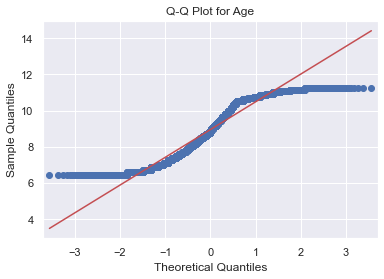

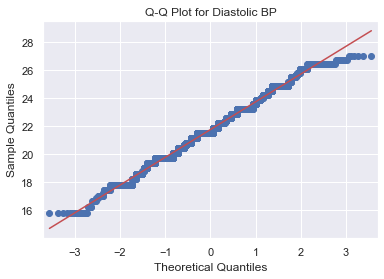

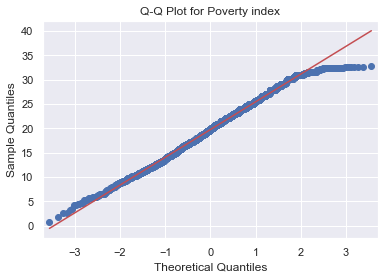

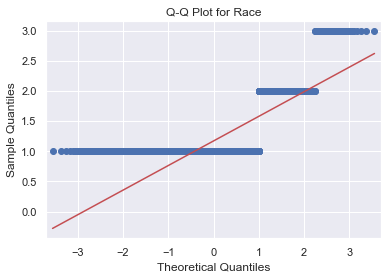

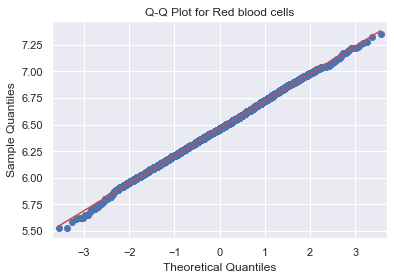

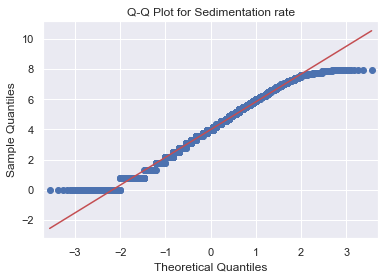

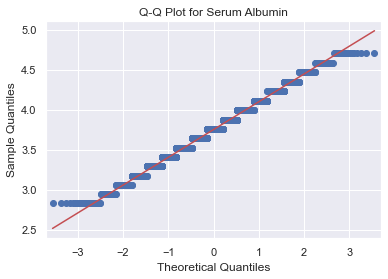

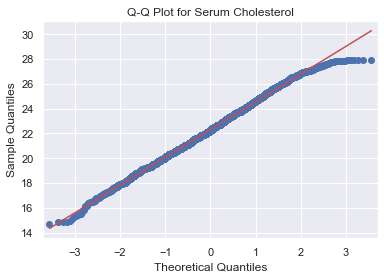

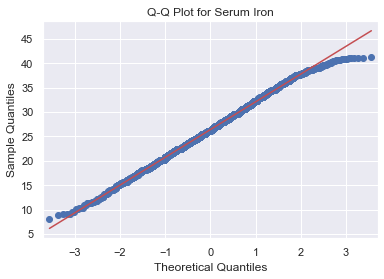

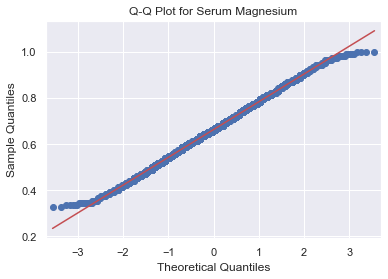

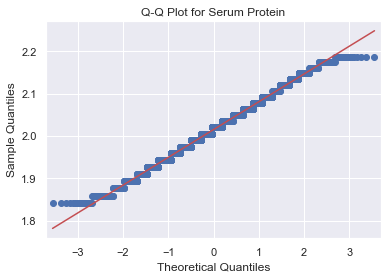

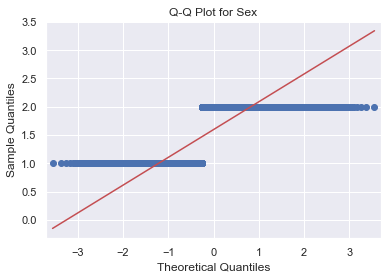

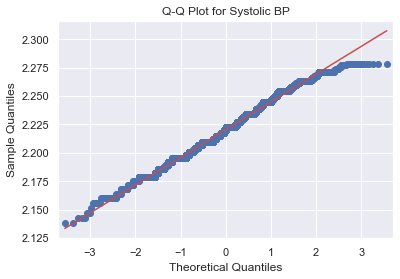

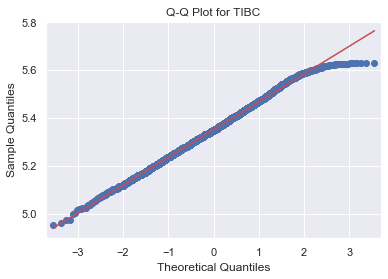

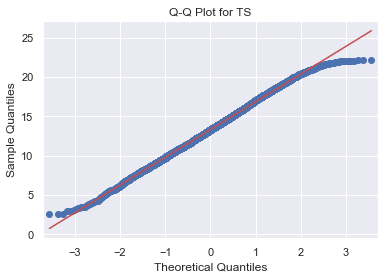

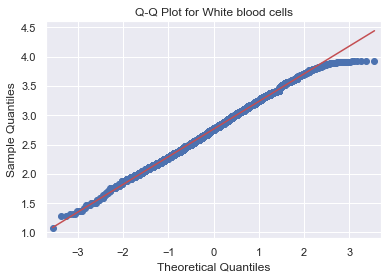

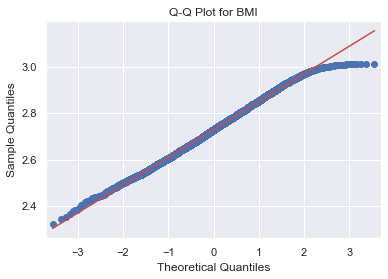

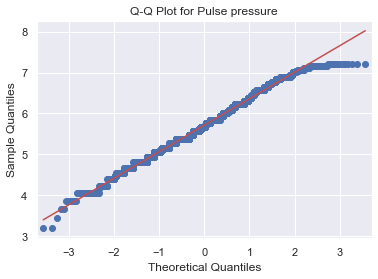

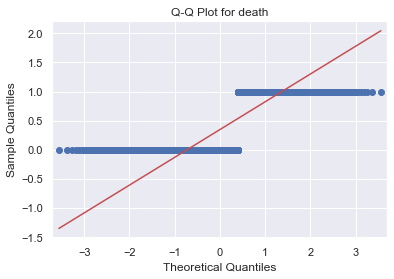

In [70]:
def QQ(data):
    for feature in data.columns:
        sm.qqplot(data[feature], line='s')
        plt.title(f"Q-Q Plot for {feature}")

QQ(Data_Transformed)

Q-Q plots shows normality if the lines lie on a straight line some of the features as shown here appear to have quite normal distributions

Results interpretation Shapiro walk test is s sensitive to departures from normality, including deviations in skewness, kurtosis, or multimodality. If the data significantly deviates from normality in these aspects.
resutls can not depend only on QQ plots alone 

### anderson test
The Anderson-Darling test tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.
H0 : features are normally distributed
HA : features are not normally distributed

In [71]:
def andrson_tst(data):
    lst_alpha, lst_stat, lst_val_crtitcal = [],[],[]
    for col in data.columns:
        result = anderson(data[col])
        lst_stat.append(result.statistic)
        lst_val_crtitcal.append(result.critical_values)
        lst_alpha.append(result.significance_level)
    return lst_alpha, lst_stat, lst_val_crtitcal

lst_alpha, lst_stat, lst_val_crtitcal = andrson_tst(Data_Transformed)

critical_to_alpha = dict(zip(np.array(lst_val_crtitcal).flatten(), np.array(lst_alpha).flatten()))
i = 0
j=0
for critical_vals , tst_stat , alphas in zip(lst_val_crtitcal, lst_stat, lst_alpha):
    for critical_val in critical_vals:
        if tst_stat > critical_val:
            i+=1
            print(f"feature {feature} for significance {critical_to_alpha[critical_val]} reject null hypothesis\n")
        else:
            j+=1
            print(f"feature {feature} for significance {critical_to_alpha[critical_val]} fail to reject null hypothesis\n")

feature Pulse pressure for significance 15.0 reject null hypothesis

feature Pulse pressure for significance 10.0 reject null hypothesis

feature Pulse pressure for significance 5.0 reject null hypothesis

feature Pulse pressure for significance 2.5 reject null hypothesis

feature Pulse pressure for significance 1.0 reject null hypothesis

feature Pulse pressure for significance 15.0 reject null hypothesis

feature Pulse pressure for significance 10.0 reject null hypothesis

feature Pulse pressure for significance 5.0 reject null hypothesis

feature Pulse pressure for significance 2.5 reject null hypothesis

feature Pulse pressure for significance 1.0 reject null hypothesis

feature Pulse pressure for significance 15.0 reject null hypothesis

feature Pulse pressure for significance 10.0 reject null hypothesis

feature Pulse pressure for significance 5.0 reject null hypothesis

feature Pulse pressure for significance 2.5 reject null hypothesis

feature Pulse pressure for significance 1.

In [72]:
print(f"number of rejecting H0 {i} , number of failing to reject H0 {j}")

number of rejecting H0 92 , number of failing to reject H0 3


## Visualizing the relations between variables

Text(0.5, 0.98, 'Scatter Plot of Age vs. Diastolic BP')

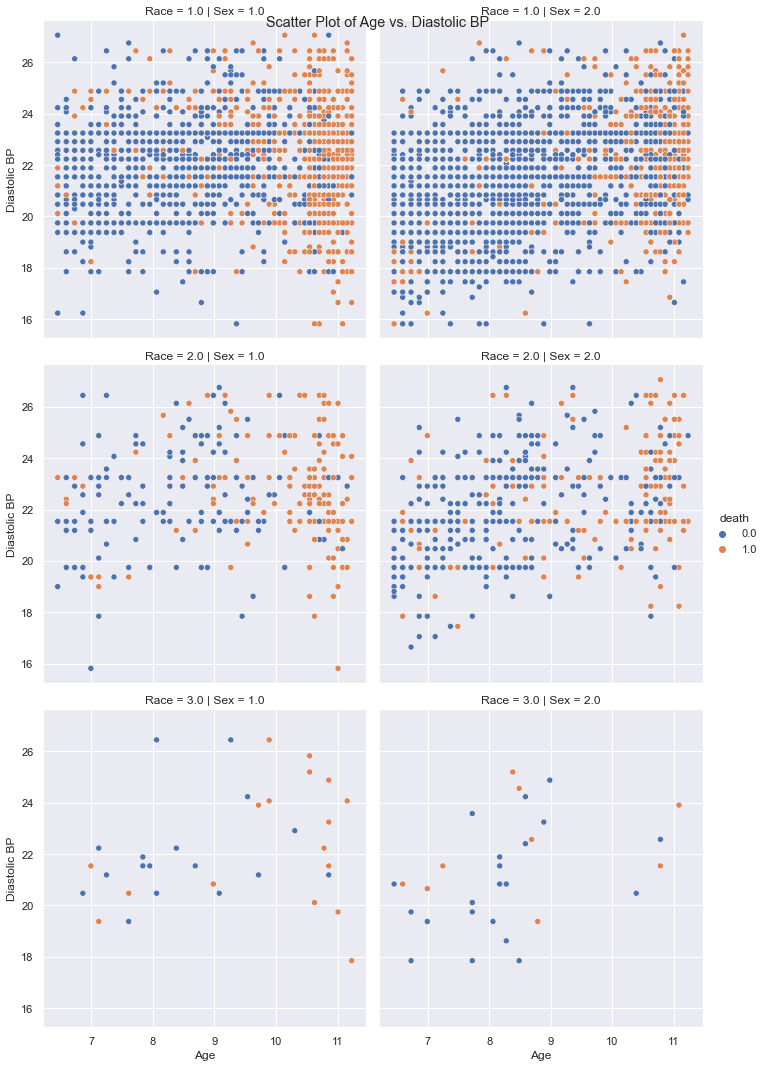

In [73]:
sns.set_theme(style="darkgrid")
plot = sns.relplot(
    data=Data_Transformed,
    x="Age",
    y = "Diastolic BP",
    hue = "death",
    col = "Sex",
    row = "Race"
)
plot.fig.suptitle("Scatter Plot of Age vs. Diastolic BP")

Text(0.5, 0.98, 'Scatter Plot of Age vs. Systolic BP')

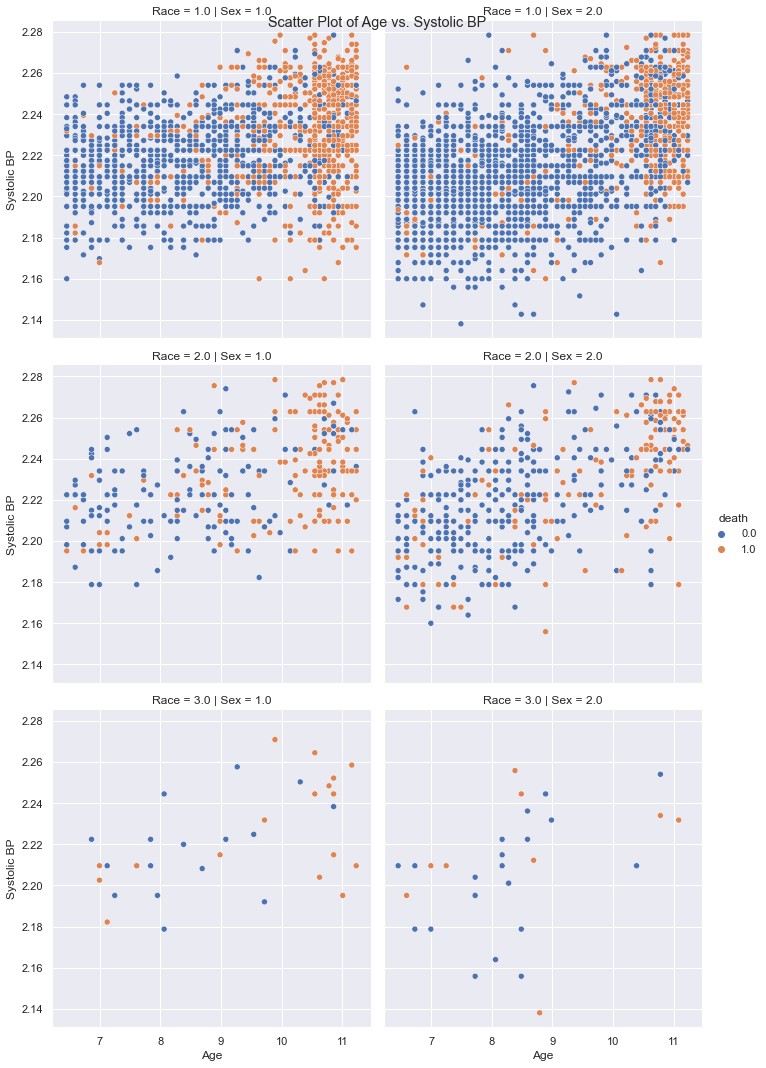

In [74]:
plot = sns.relplot(
    data=Data_Transformed,
    x="Age",
    y = "Systolic BP",
    hue = "death",
    col = "Sex",
    row = "Race"
)
plot.fig.suptitle("Scatter Plot of Age vs. Systolic BP")

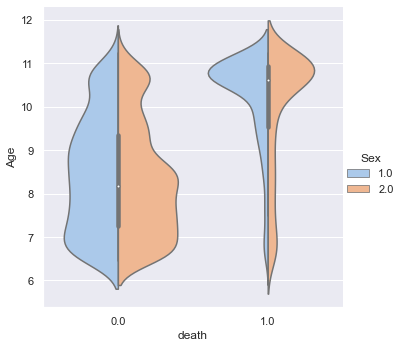

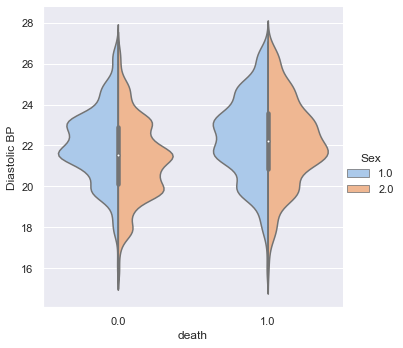

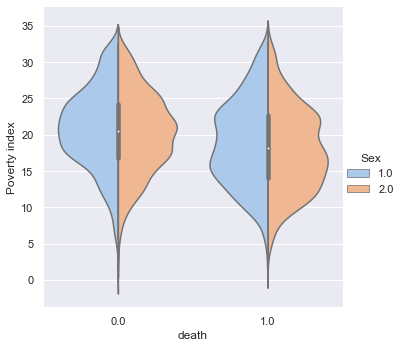

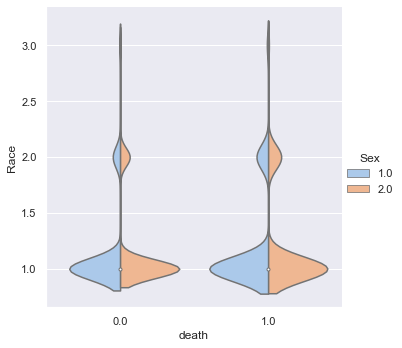

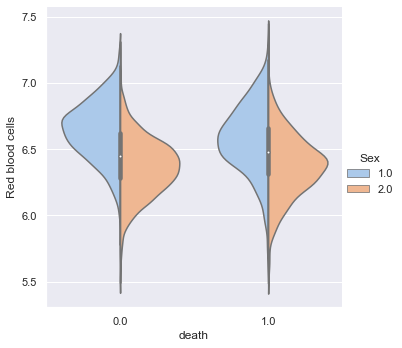

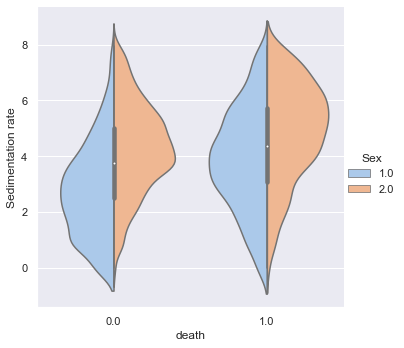

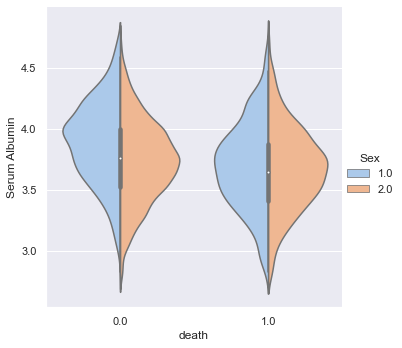

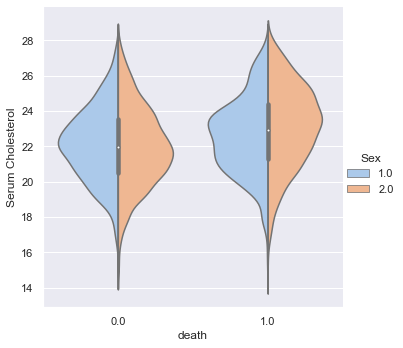

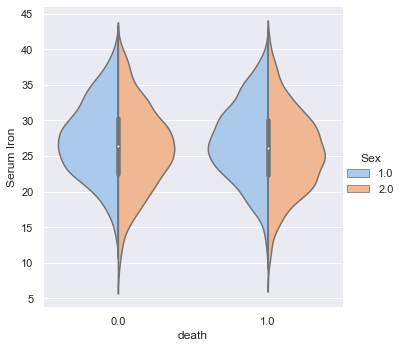

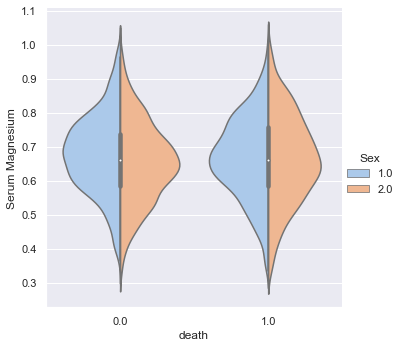

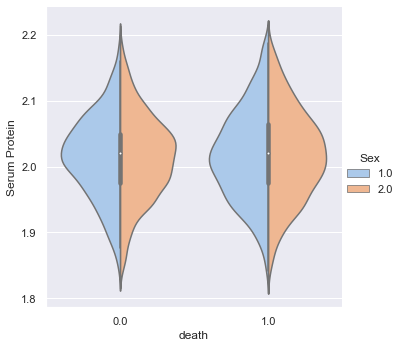

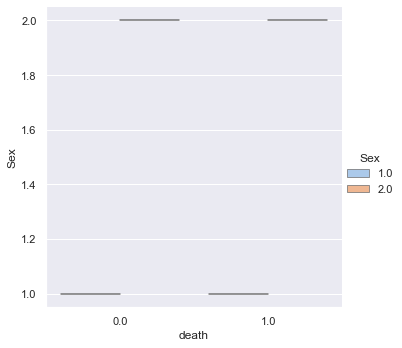

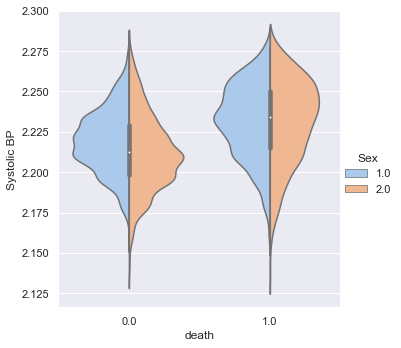

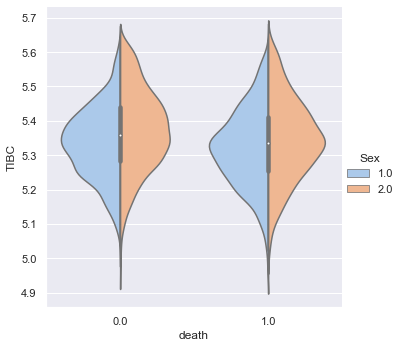

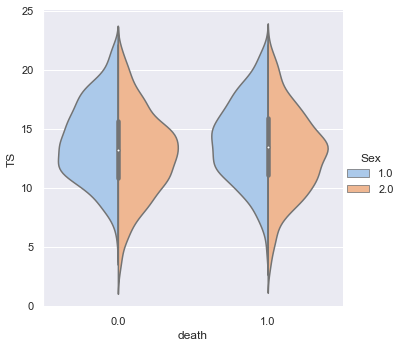

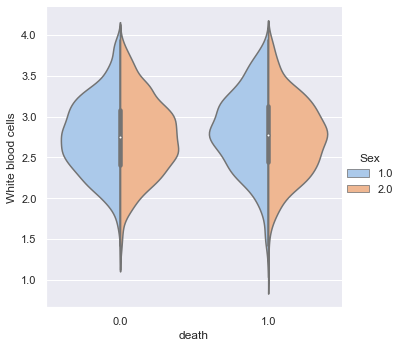

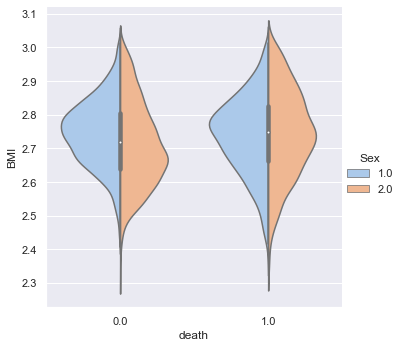

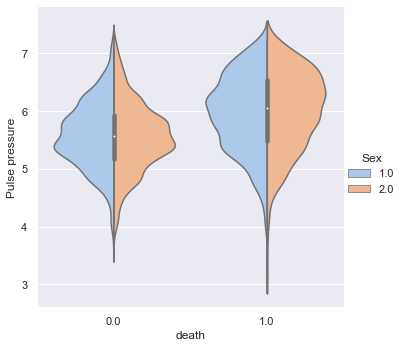

In [75]:
for feature in Features:
    g = sns.catplot(data=Data_Transformed, x="death", y=feature, kind="violin", hue = "Sex", palette="pastel", split=True)

In [80]:
Data_Transformed.corr()

Age  Diastolic BP  Poverty index      Race  \
Age                 1.000000      0.291798      -0.100019 -0.018783   
Diastolic BP        0.291798      1.000000      -0.071159  0.087421   
Poverty index      -0.100019     -0.071159       1.000000 -0.231456   
Race               -0.018783      0.087421      -0.231456  1.000000   
Red blood cells     0.050350      0.193622       0.053237 -0.058084   
Sedimentation rate  0.201799      0.034238      -0.192612  0.151557   
Serum Albumin      -0.202250      0.024646       0.110693 -0.091172   
Serum Cholesterol   0.397950      0.202611       0.010656 -0.028353   
Serum Iron          0.024671     -0.025917       0.100619 -0.078625   
Serum Magnesium     0.112071      0.039674       0.049031 -0.133447   
Serum Protein      -0.062779      0.125883      -0.109272  0.190246   
Sex                -0.159008     -0.170959      -0.035997 -0.006177   
Systolic BP         0.514147      0.693764      -0.104307  0.059734   
TIBC               -0.216511      0.004064      -0.024349 -0.029197   
TS                  0.109631     -0.027880       0.104496 -0.064547   
White blood cells  -0.070837     -0.003962       0.038781 -0.142438   
BMI                 0.164018      0.324683      -0.065482  0.054178   
Pulse pressure      0.468159      0.160388      -0.086384  0.012232   
death               0.515121      0.174861      -0.168156  0.049849   

                    Red blood cells  Sedimentation rate  Serum Albumin  \
Age                        0.050350            0.201799      -0.202250   
Diastolic BP               0.193622            0.034238       0.024646   
Poverty index              0.053237           -0.192612       0.110693   
Race                      -0.058084            0.151557      -0.091172   
Red blood cells            1.000000           -0.366205       0.166854   
Sedimentation rate        -0.366205            1.000000      -0.220556   
Serum Albumin              0.166854           -0.220556       1.000000   
Serum Cholesterol          0.093624            0.126024       0.056667   
Serum Iron                 0.097356           -0.151768       0.106993   
Serum Magnesium            0.095069           -0.095041       0.156403   
Serum Protein              0.115908            0.151830       0.477986   
Sex                       -0.468661            0.318152      -0.124482   
Systolic BP                0.128052            0.109993      -0.036394   
TIBC                      -0.006006            0.023207       0.122394   
TS                         0.088502           -0.150475       0.047285   
White blood cells          0.151386           -0.018028       0.030393   
BMI                        0.195706            0.088442      -0.011870   
Pulse pressure             0.014740            0.124563      -0.071105   
death                      0.054312            0.146213      -0.137484   

                    Serum Cholesterol  Serum Iron  Serum Magnesium  \
Age                          0.397950    0.024671         0.112071   
Diastolic BP                 0.202611   -0.025917         0.039674   
Poverty index                0.010656    0.100619         0.049031   
Race                        -0.028353   -0.078625        -0.133447   
Red blood cells              0.093624    0.097356         0.095069   
Sedimentation rate           0.126024   -0.151768        -0.095041   
Serum Albumin                0.056667    0.106993         0.156403   
Serum Cholesterol            1.000000    0.079157         0.109823   
Serum Iron                   0.079157    1.000000         0.009707   
Serum Magnesium              0.109823    0.009707         1.000000   
Serum Protein                0.070775    0.021340         0.048668   
Sex                         -0.010055   -0.107681        -0.075012   
Systolic BP                  0.260040   -0.024168         0.039068   
TIBC                         0.024144    0.044848        -0.040930   
TS                           0.059763    0.911736         0.025897   
Whi

<AxesSubplot:>

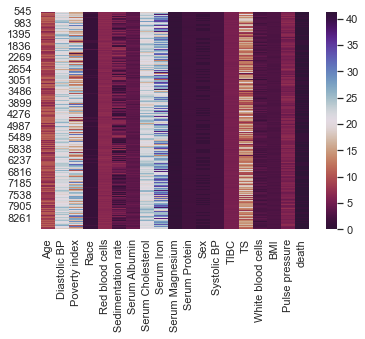

In [83]:
sns.heatmap(Data_Transformed, cmap="twilight_shifted_r", annot=False, fmt=".2f")